<a href="https://colab.research.google.com/github/sanjayyanadi/supervised_model_classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default paYments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')  
df = pd.read_csv('/content/drive/MyDrive/ALMABETTER/CAPSTONE_PROJECT/supervised_classification/default_of_credit_card_clients.csv')

Mounted at /content/drive/


In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [3]:
def plot(df, col, hue='default payment next month', hue_order=None, is_pct=True, figsize=(15,10)):
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue, hue_order=None)
    plt.show()
    print()
    print("Percentage share of feature ")
    print(df[col].value_counts(normalize=True)*100)

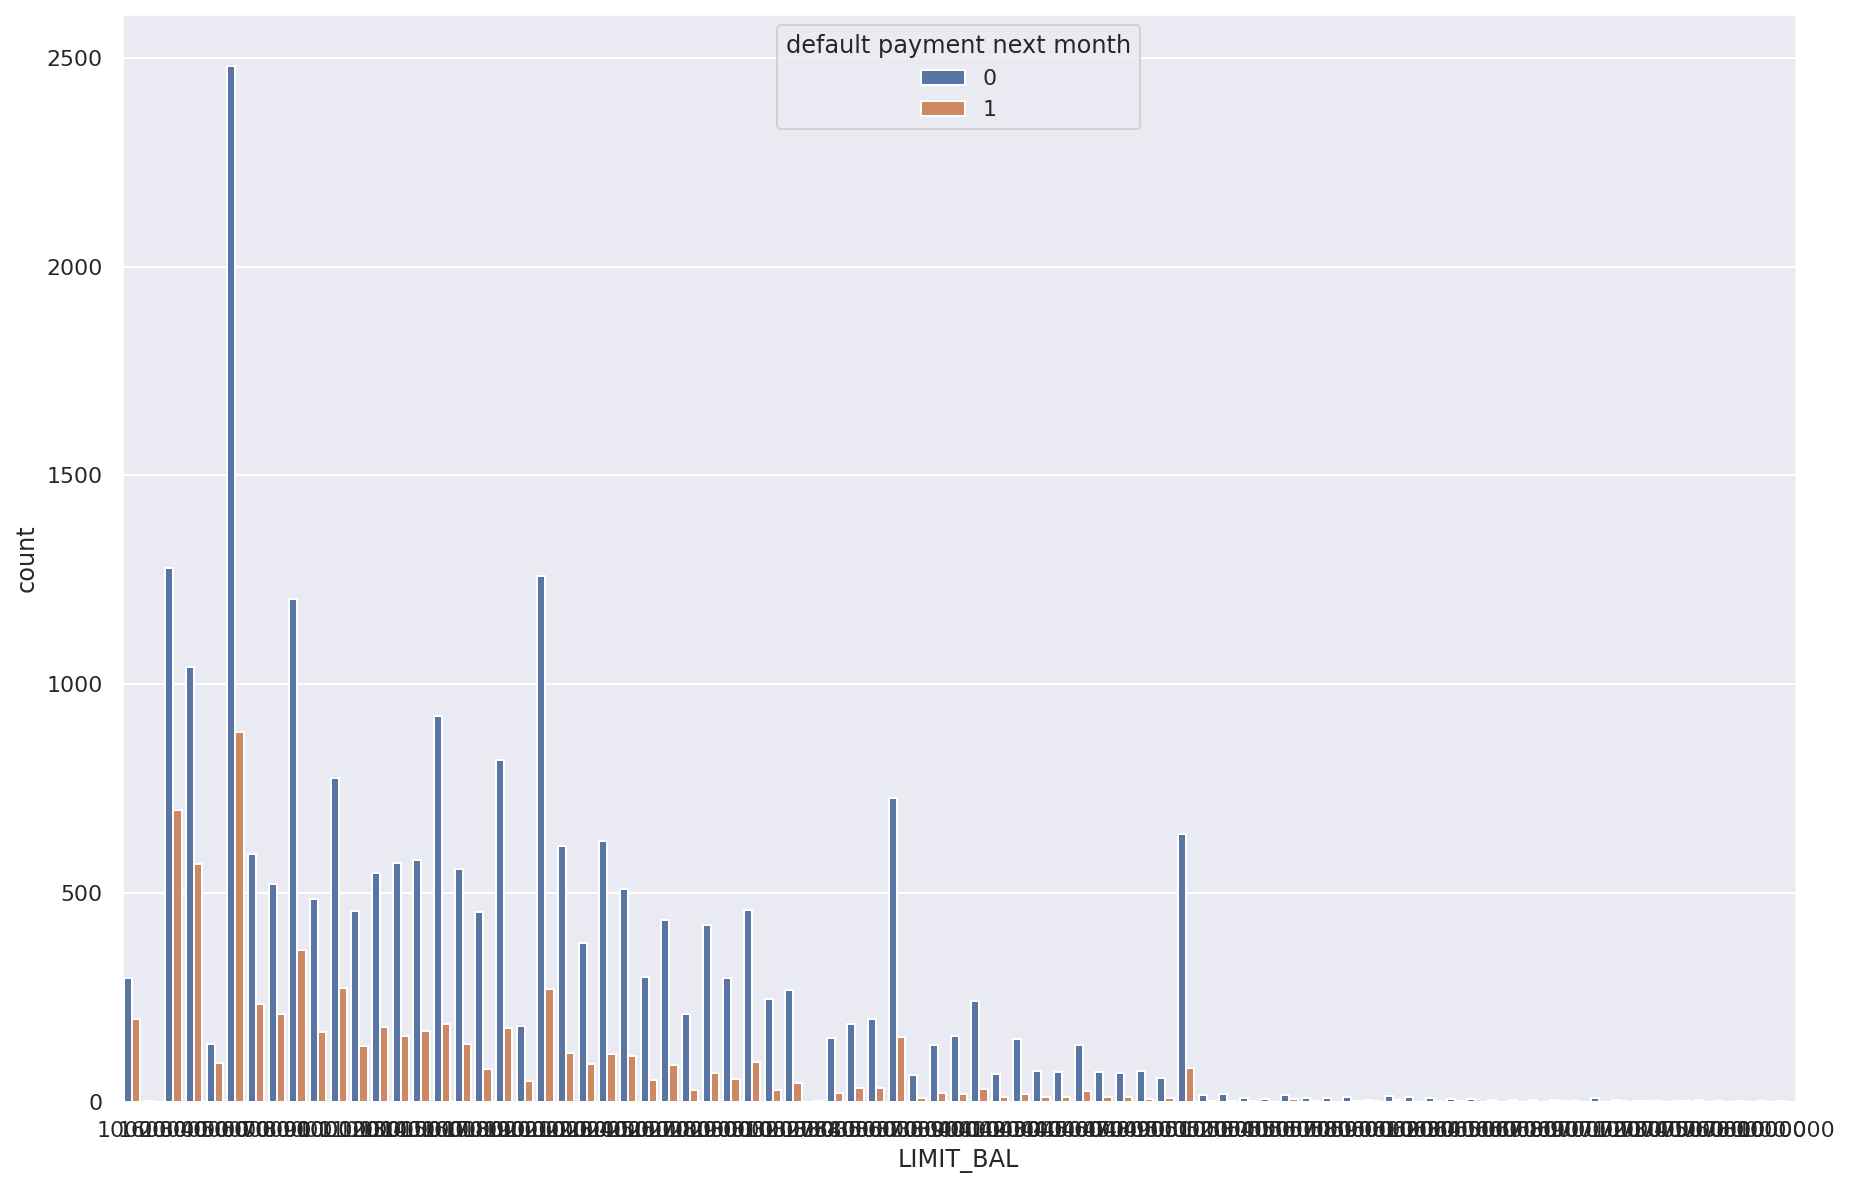


Percentage share of feature 
50000      11.216667
20000       6.586667
30000       5.366667
80000       5.223333
200000      5.093333
             ...    
730000      0.006667
1000000     0.003333
327680      0.003333
760000      0.003333
690000      0.003333
Name: LIMIT_BAL, Length: 81, dtype: float64


In [4]:
plot(df,col="LIMIT_BAL")

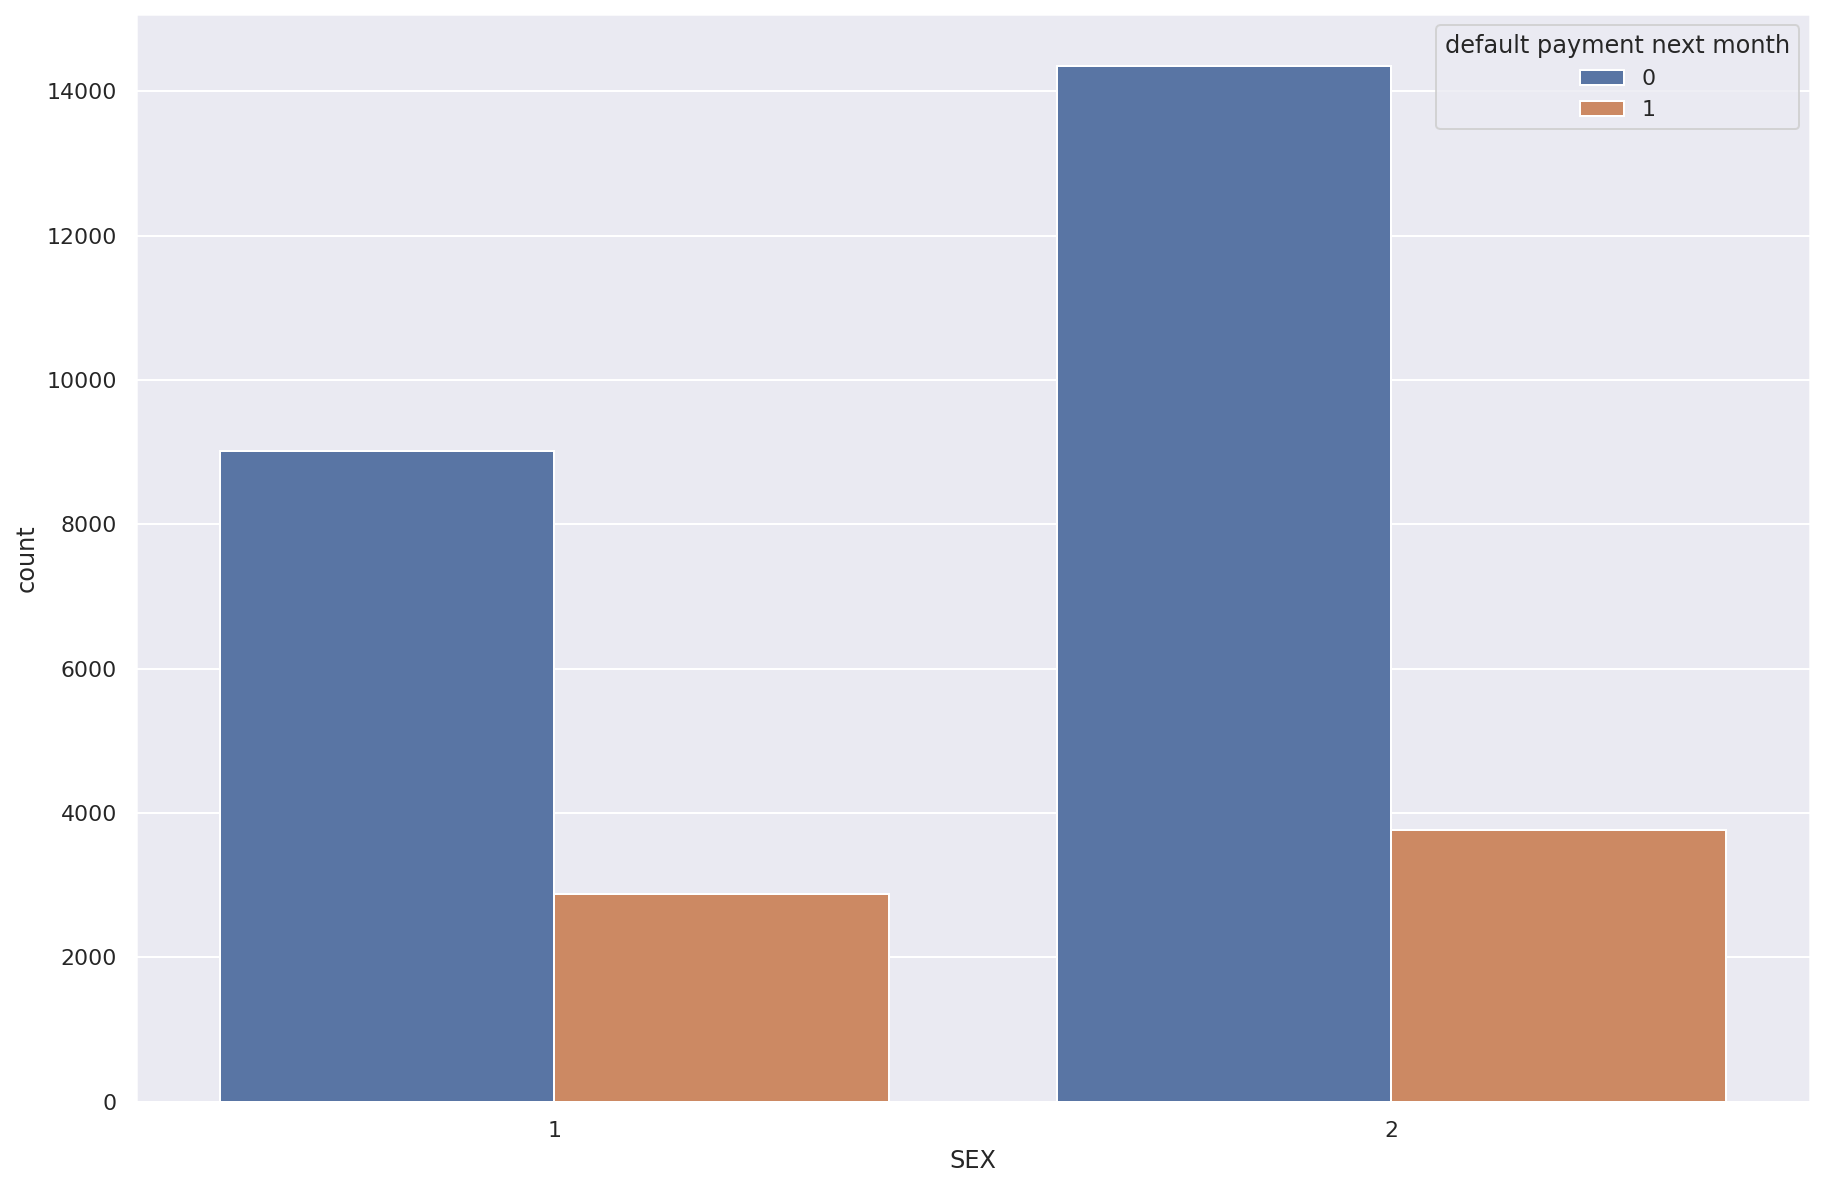


Percentage share of feature 
2    60.373333
1    39.626667
Name: SEX, dtype: float64


In [5]:
plot(df,col="SEX")

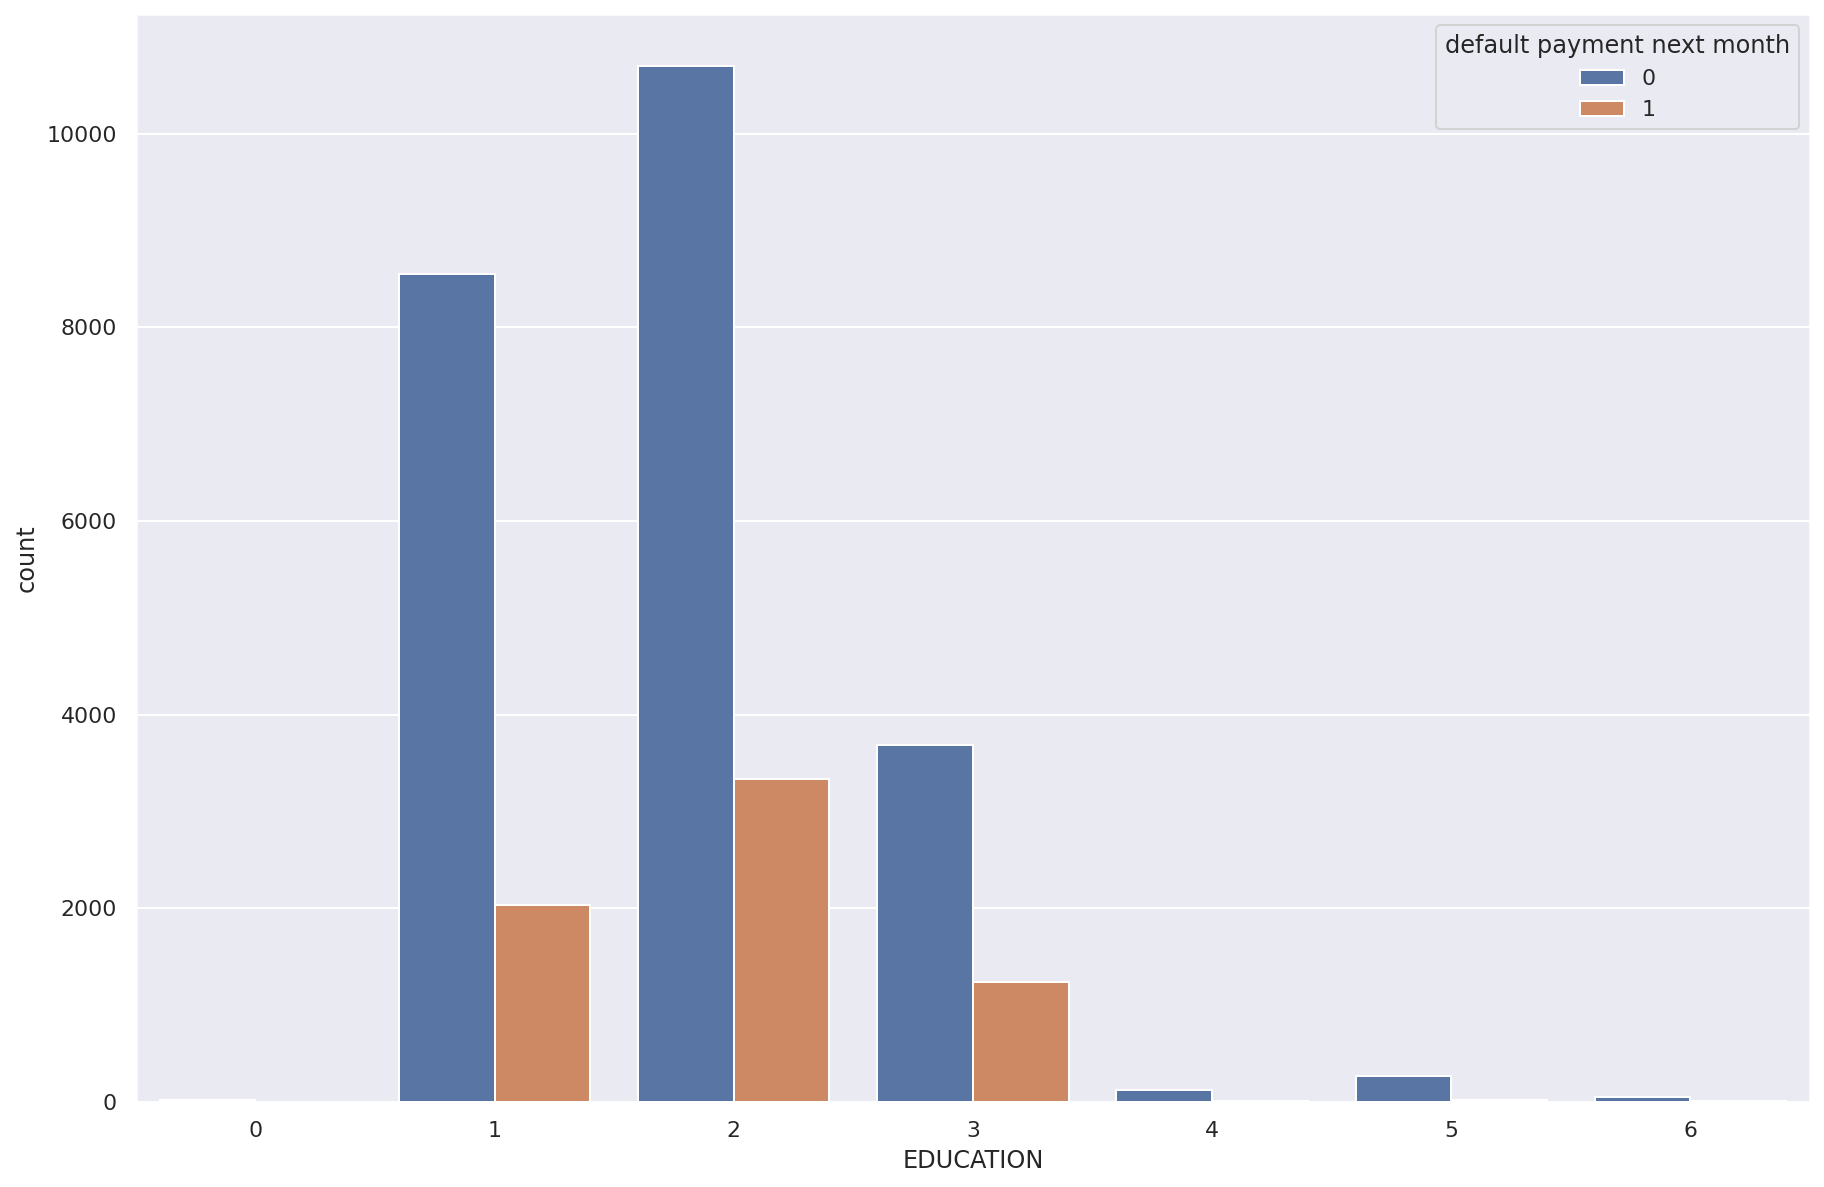


Percentage share of feature 
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64


In [11]:
plot(df,col="EDUCATION")

People who are educated (1=graduate school, 2=university, 3=high school) are more likely to default on payments.

Majority of the credit card holders are from educated population.

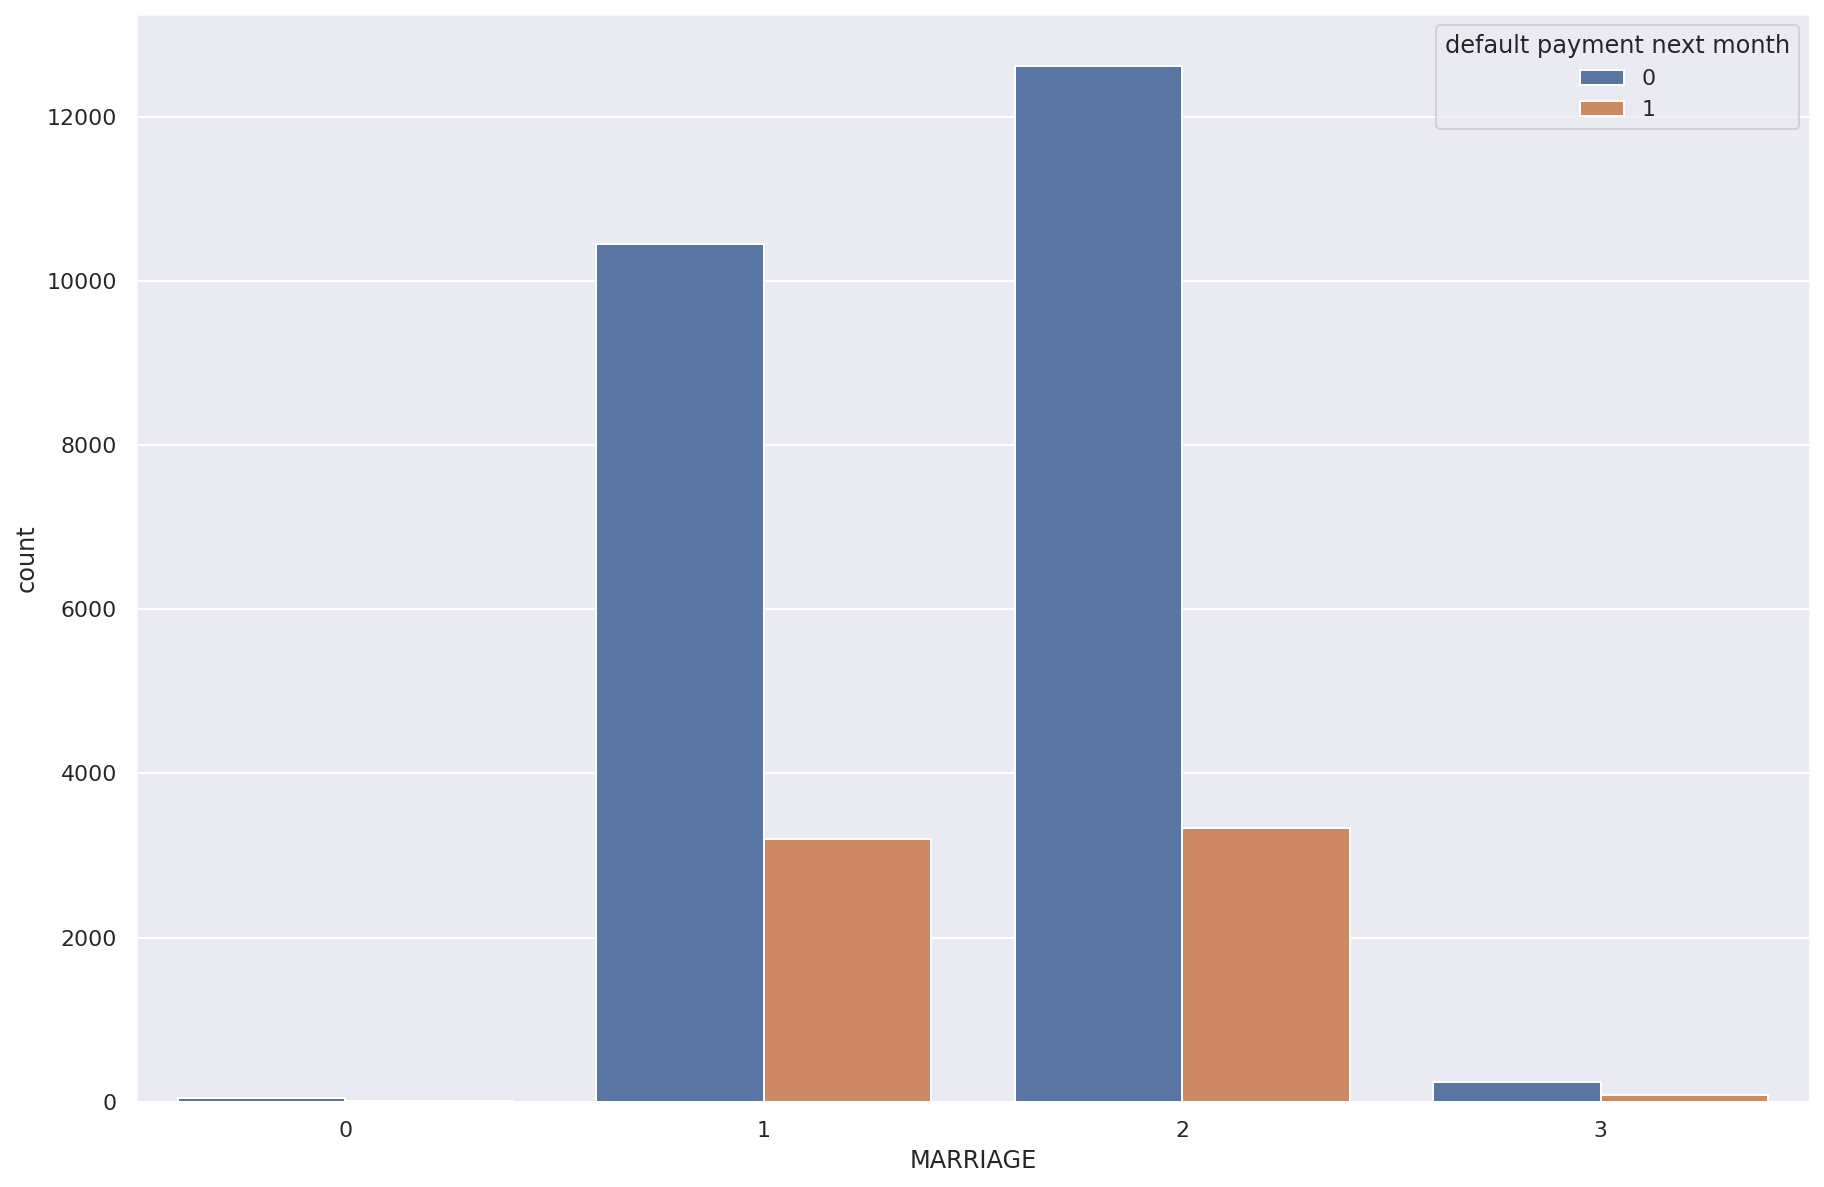


Percentage share of feature 
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64


In [ ]:
plot(df,col="MARRIAGE")

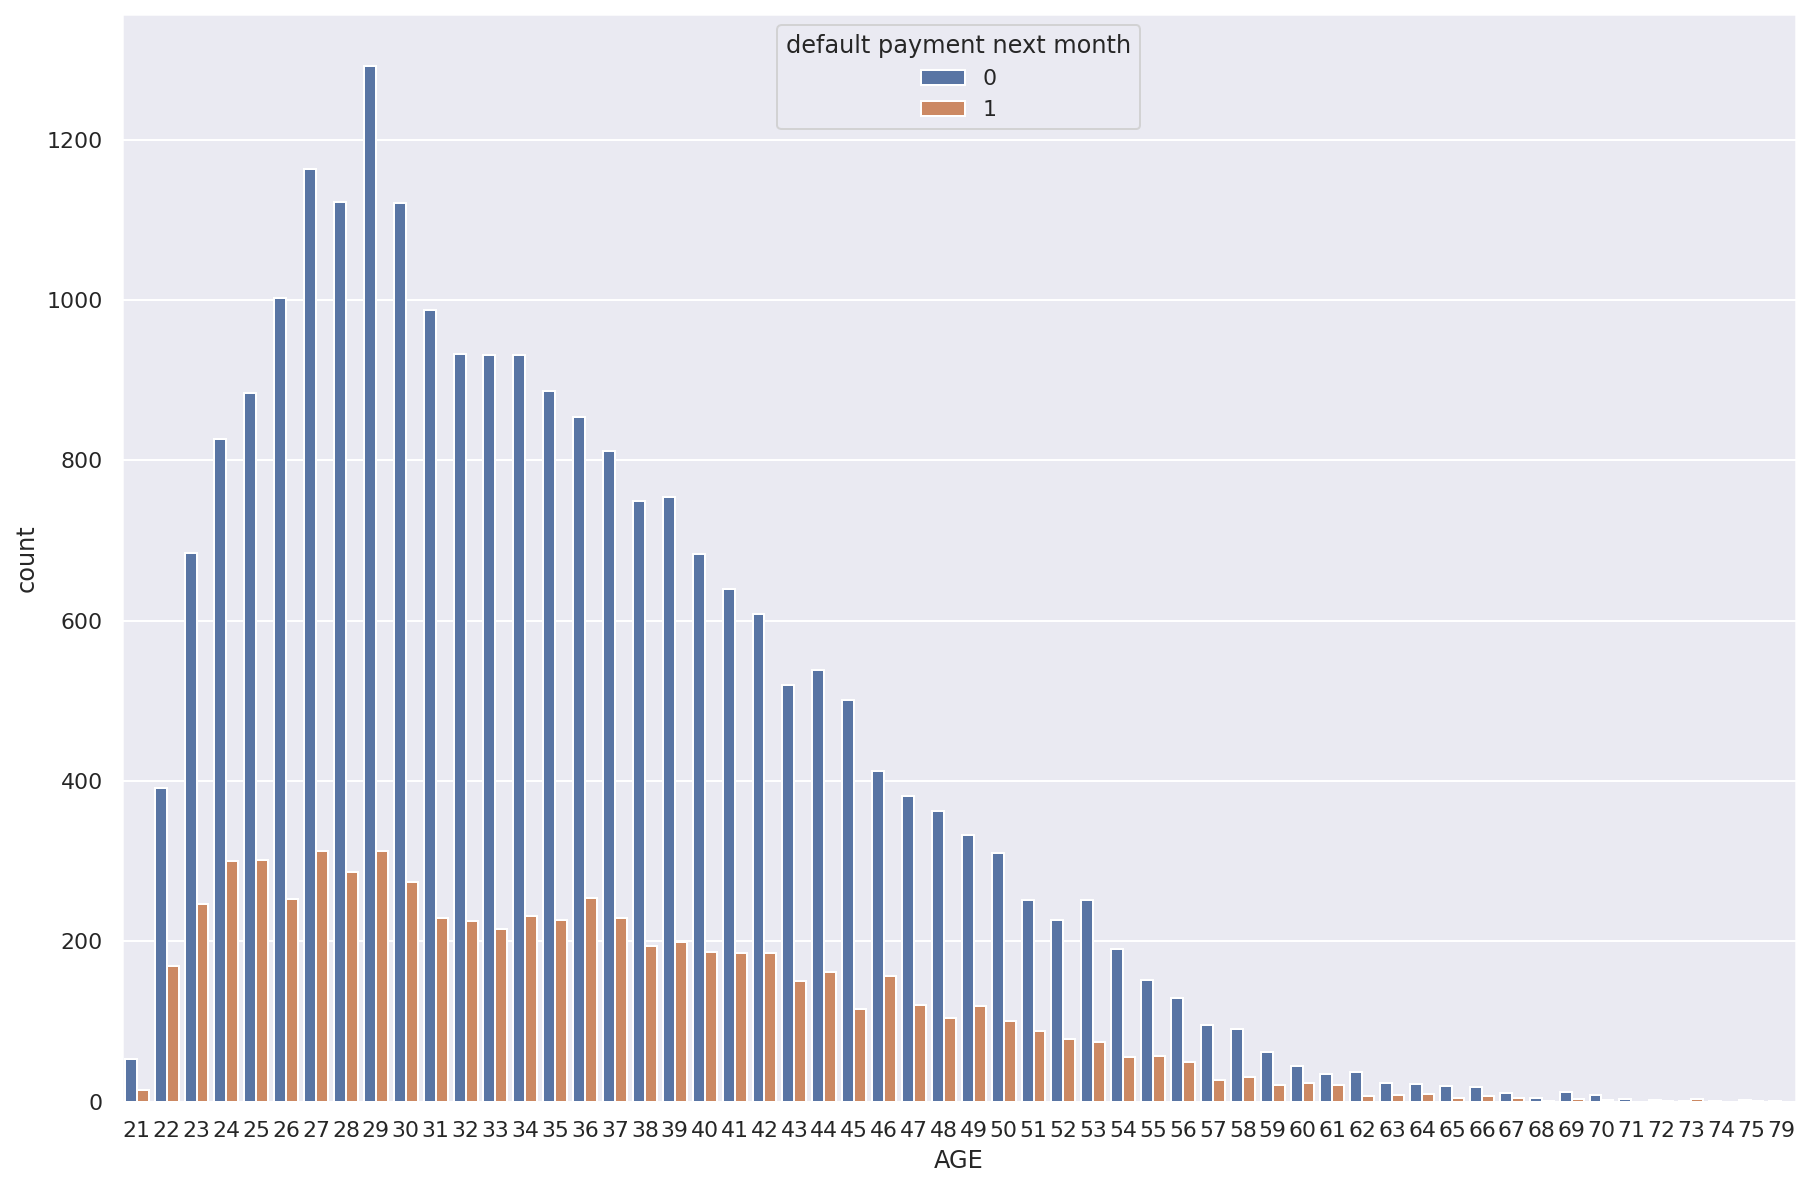


Percentage share of feature 
29    5.350000
27    4.923333
28    4.696667
30    4.650000
26    4.186667
31    4.056667
25    3.953333
34    3.873333
32    3.860000
33    3.820000
24    3.756667
35    3.710000
36    3.693333
37    3.470000
39    3.180000
38    3.146667
23    3.103333
40    2.900000
41    2.746667
42    2.646667
44    2.333333
43    2.233333
45    2.056667
46    1.900000
22    1.866667
47    1.670000
48    1.553333
49    1.506667
50    1.370000
51    1.133333
53    1.083333
52    1.013333
54    0.823333
55    0.696667
56    0.593333
58    0.406667
57    0.406667
59    0.276667
60    0.223333
21    0.223333
61    0.186667
62    0.146667
63    0.103333
64    0.103333
66    0.083333
65    0.080000
67    0.053333
69    0.050000
70    0.033333
68    0.016667
73    0.013333
72    0.010000
75    0.010000
71    0.010000
79    0.003333
74    0.003333
Name: AGE, dtype: float64


In [13]:
plot(df,col="AGE")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa47c425b10>,
      dtype=object)

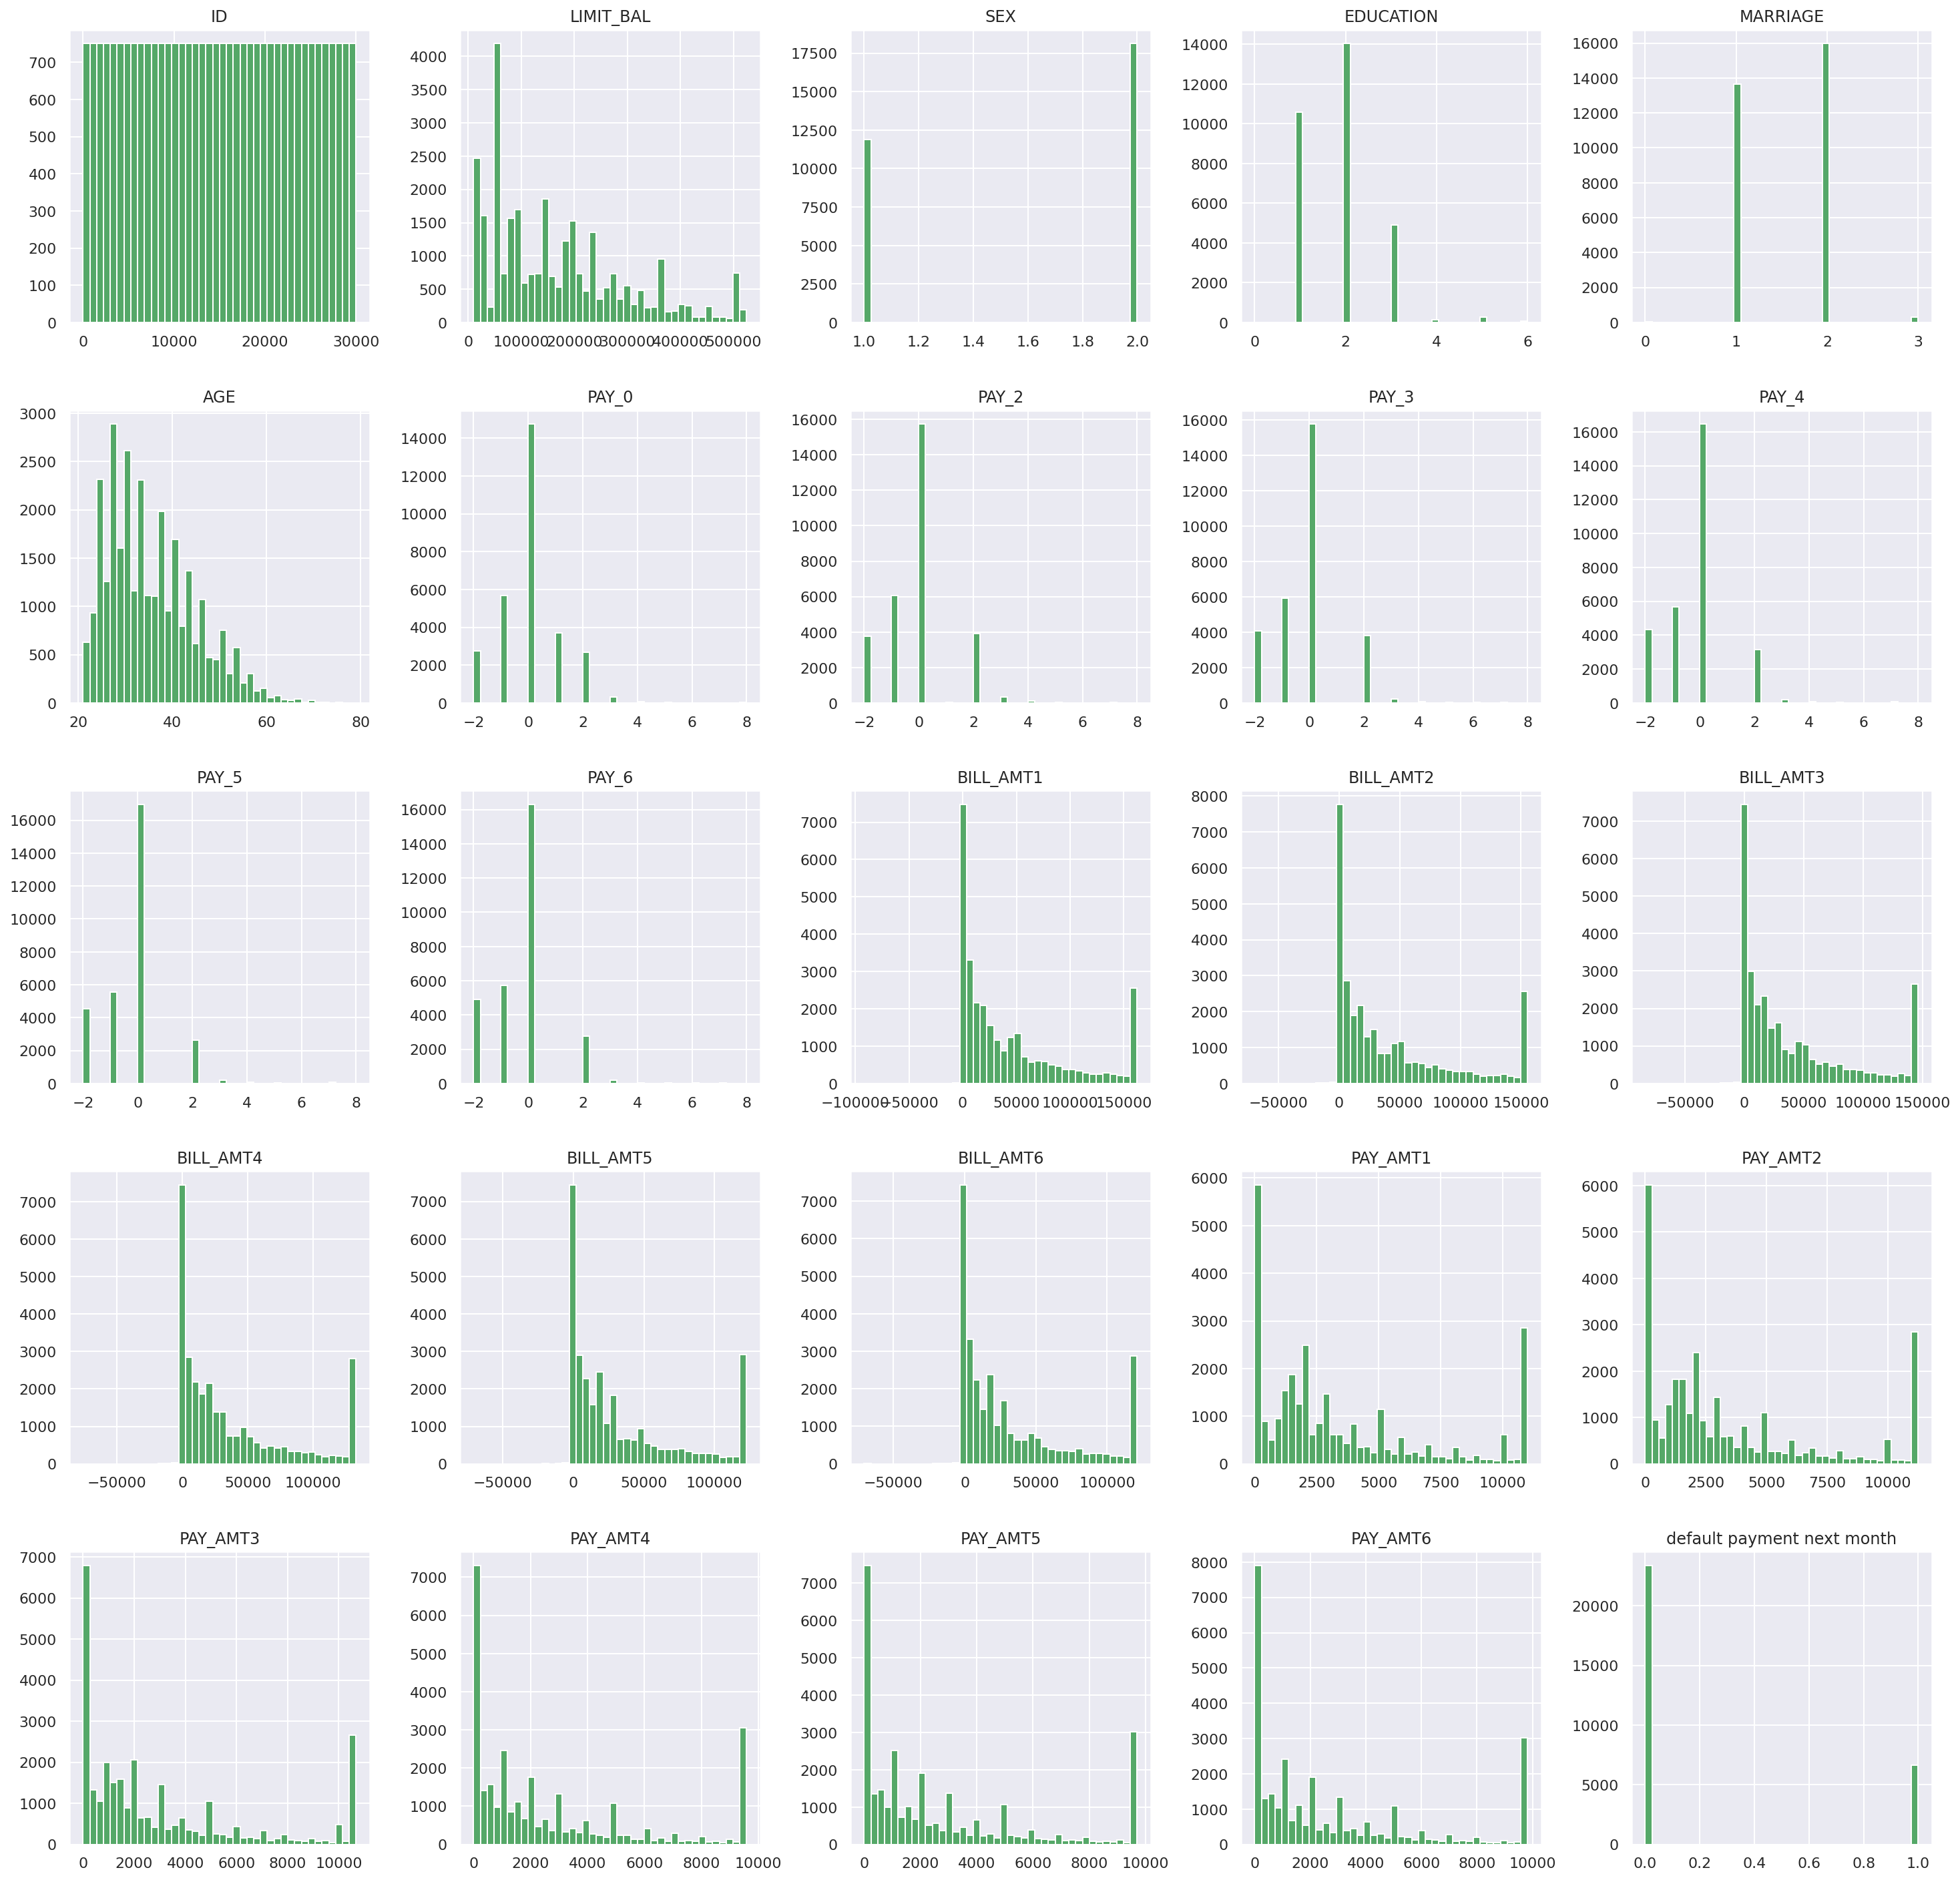

In [12]:
df.hist(bins =40, figsize=(25,25), color='g')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

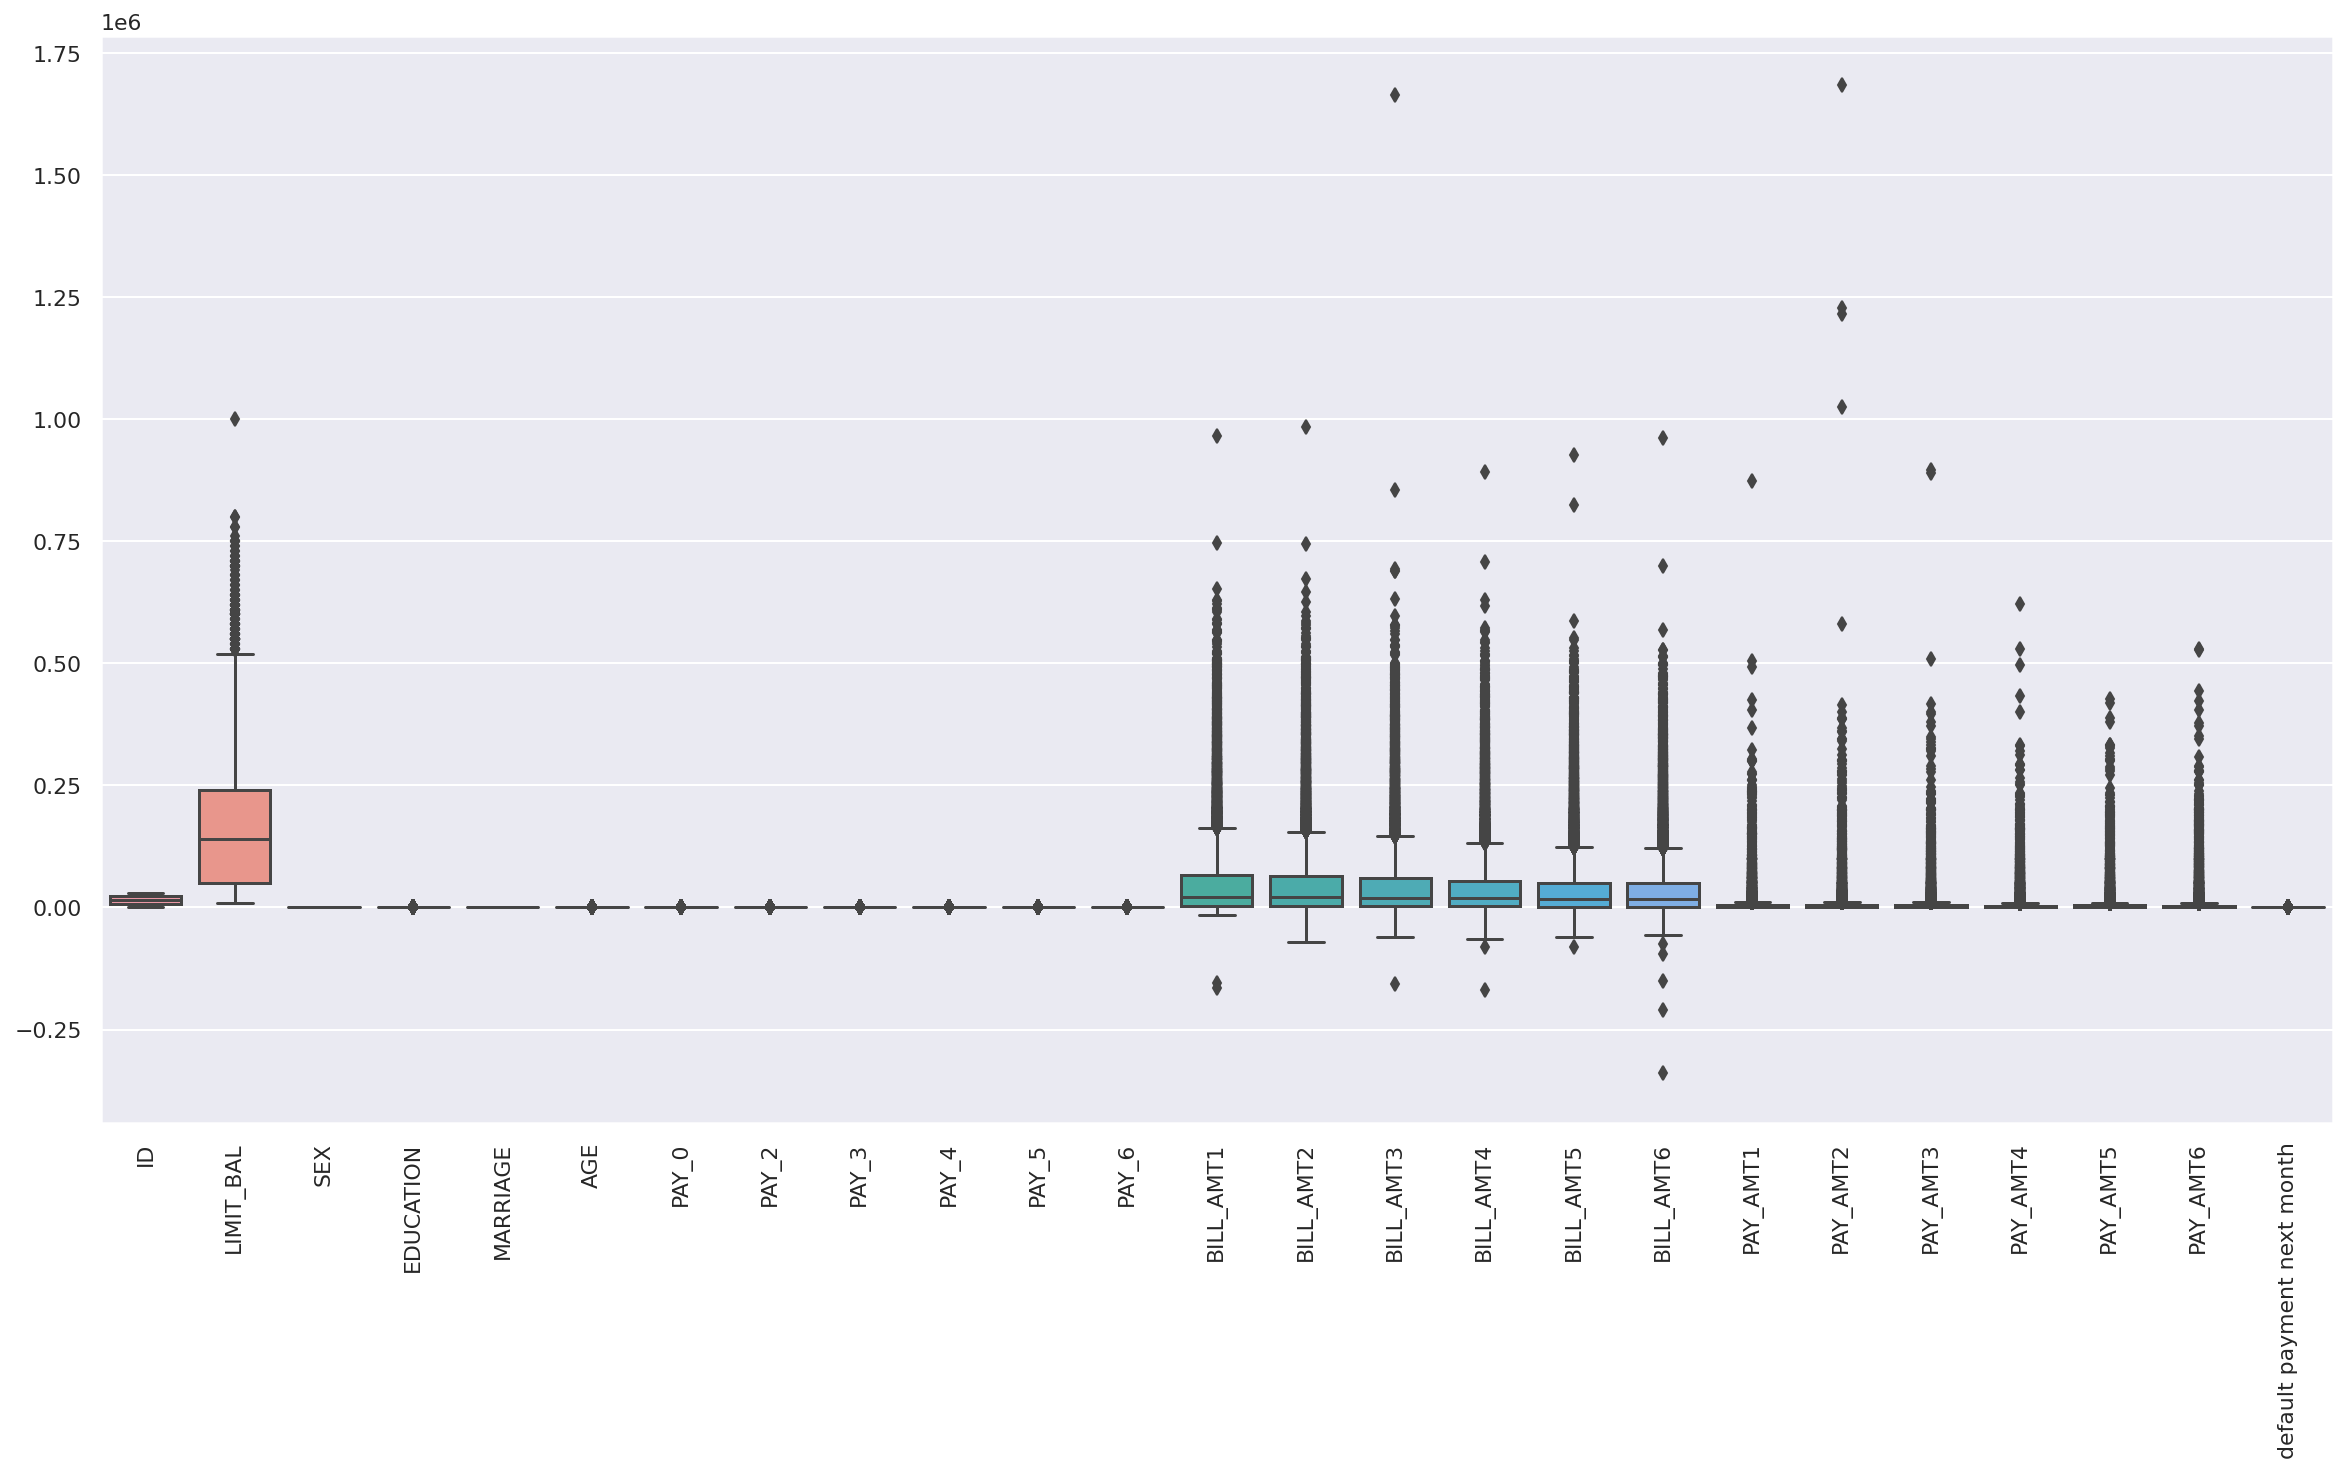

In [ ]:
# checking for outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation = 90)

In [6]:
continuous_variable = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [7]:
def cap_data(df):
    for col in continuous_variable:
        print("done with ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            Q1 = np.percentile(df[col],25,interpolation = 'midpoint')
            Q3 = np.percentile(df[col],75,interpolation = 'midpoint')
            IQR = Q3 - Q1
            upper = Q3 +1.5*IQR
            lower = Q1 - 1.5*IQR
    
            percentiles = df[col].quantile([0.25,0.75]).values
            df[col][df[col] <= lower] = lower
            df[col][df[col] >= upper] = upper
        else:
            df[col]=df[col]
    return df

final_df_IQR=cap_data(df).copy()

done with  LIMIT_BAL
done with  BILL_AMT1
done with  BILL_AMT2
done with  BILL_AMT3
done with  BILL_AMT4
done with  BILL_AMT5
done with  BILL_AMT6
done with  PAY_AMT1
done with  PAY_AMT2
done with  PAY_AMT3
done with  PAY_AMT4
done with  PAY_AMT5
done with  PAY_AMT6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykern

Text(0.5, 1.0, 'Original Data')

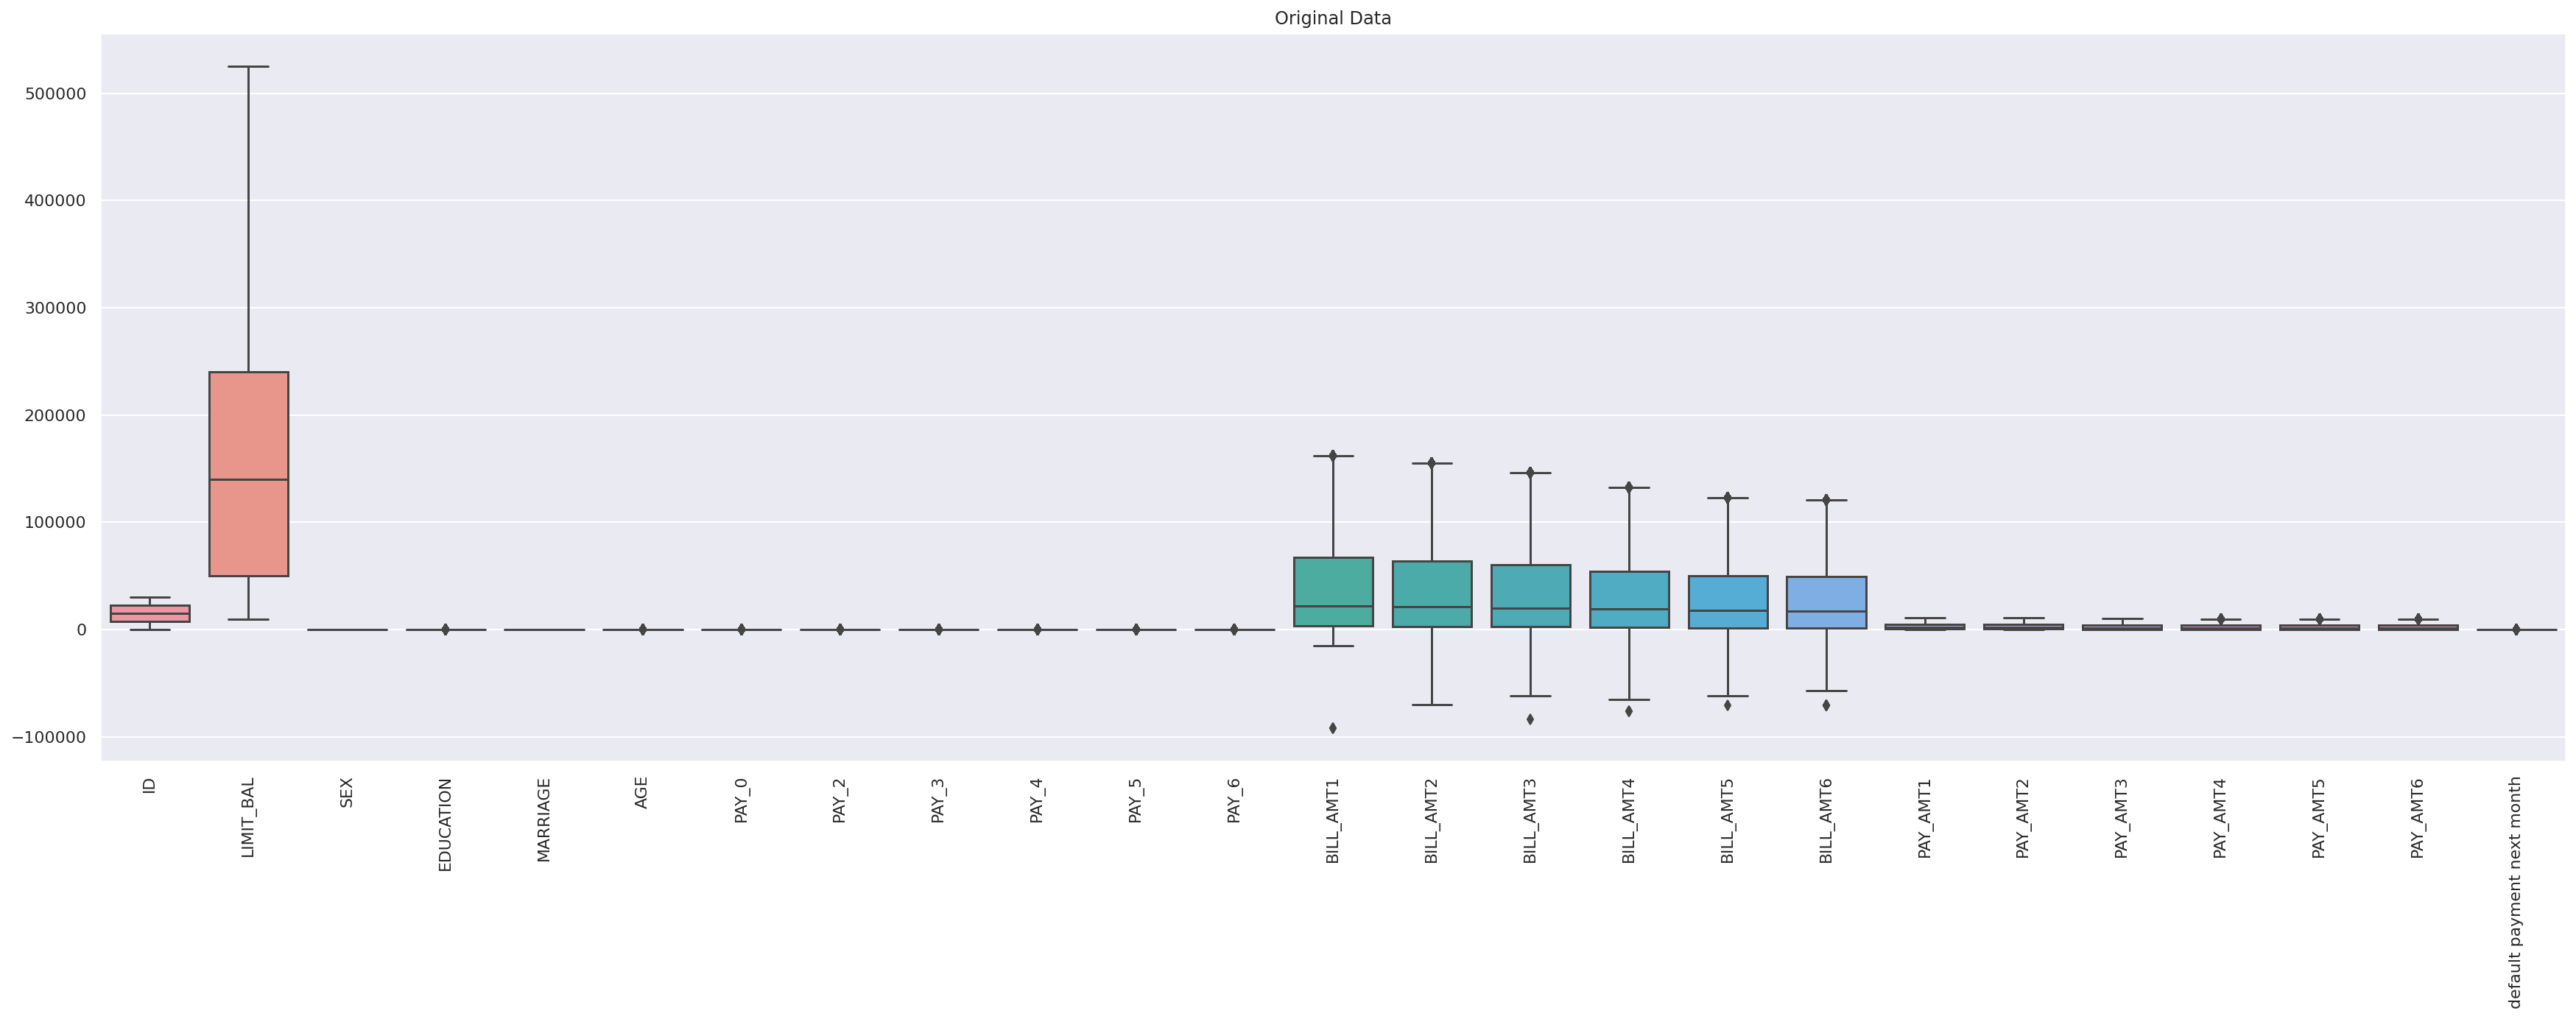

In [8]:
plt.figure(figsize=(30,20))
plt.subplot(2, 1, 1)
sns.boxplot(data=final_df_IQR)
plt.xticks(rotation = 90)
plt.title('Original Data')

In [9]:
X=df.drop(columns=['default payment next month','ID'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature'] = X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values('vif')

,feature,vif
5,PAY_0,1.969789
22,PAY_AMT6,3.066685
6,PAY_2,3.466055
10,PAY_6,3.804652
21,PAY_AMT5,4.007265
0,LIMIT_BAL,4.180025
20,PAY_AMT4,4.198821
7,PAY_3,4.326763
19,PAY_AMT3,4.326934
18,PAY_AMT2,4.750214


around 24% of male customers have defaulted and around 20% of female customers have defaulted.

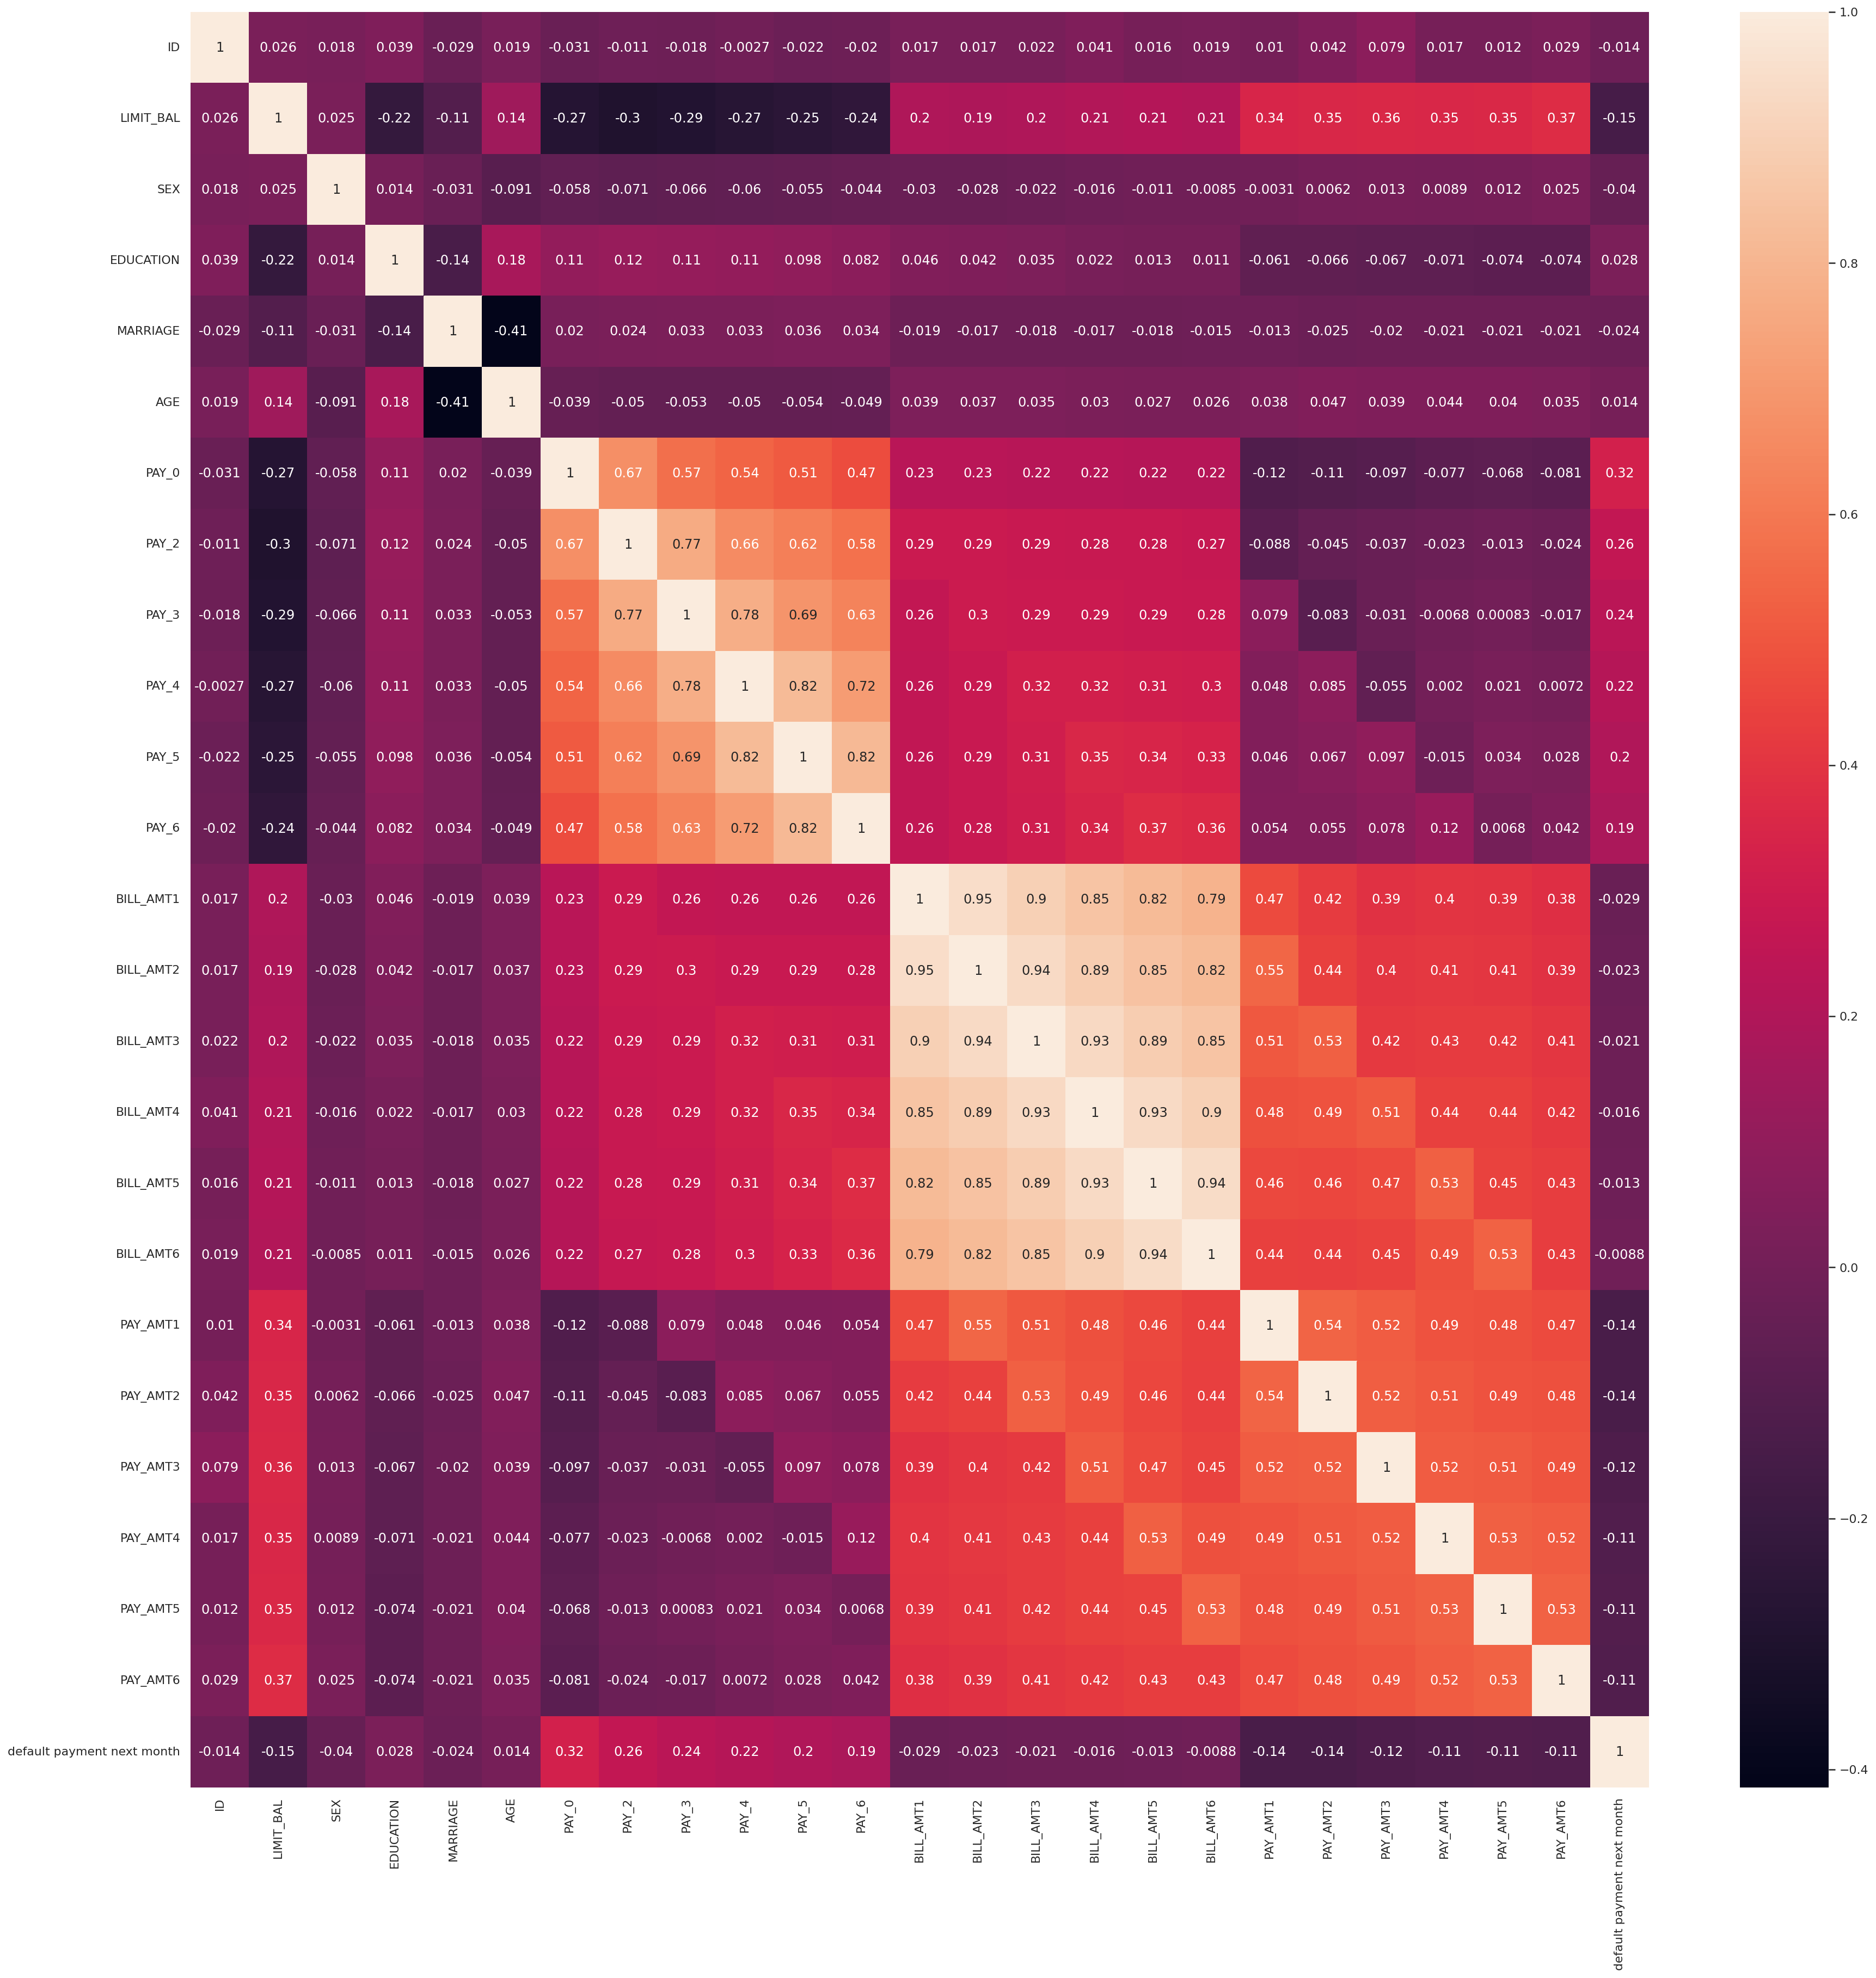

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, annot = True)

#Looking at above correlation heatmap, we can see following observations:
# 1. BILL_AMT1 to BILL_AMT6 are highly correlated with each other.
# 2. There also seems some sort of correlation between "BILL_AMT and PAY_AMT", ans also between "BILL_AMT and PAY_".
# 3. There is NOT considerable correlation betweem "PAY_AMT amd PAY_"

#Individually, "PAY", "BILL_AMT" and "PAY_AMT" has high correlation among there 6 month's observation.
#So, we will keep only one observation from each of there groups and will remove other observations.

#For simplicity and generality, lets keep PAY_1, BILL_AMT1 and PAY_AMT1

 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_0, dtype: float64
 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64
 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64
 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0.193333
 5     0.116667
 6     0.016667
 1     0.006667
 8     0.006667
Name: PAY_4, dtype: float64
 0    56.490000
-1    18.463333
-2    15.153333
 2     8.753333
 3     0.593333
 4     0.280000
 7     0.193333
 5     0.056667
 6     0.013333
 8     0.003333
Name: PAY_5, dtype: floa

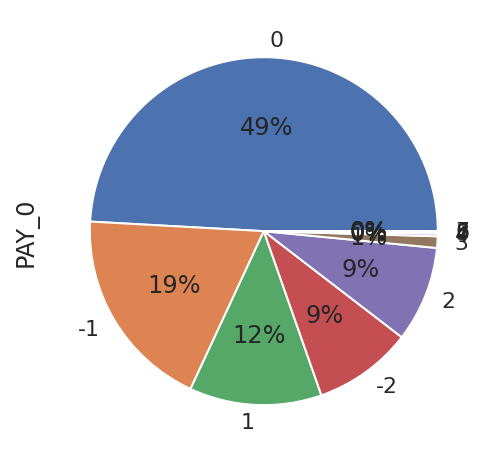

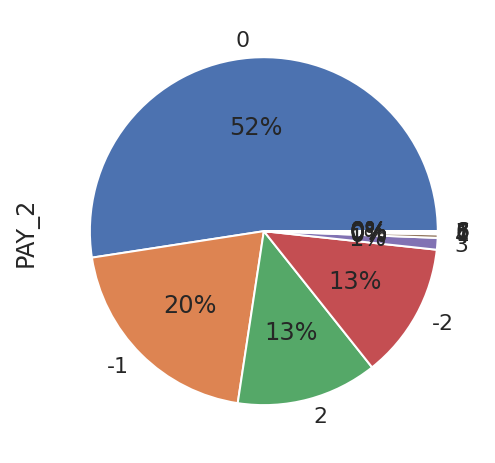

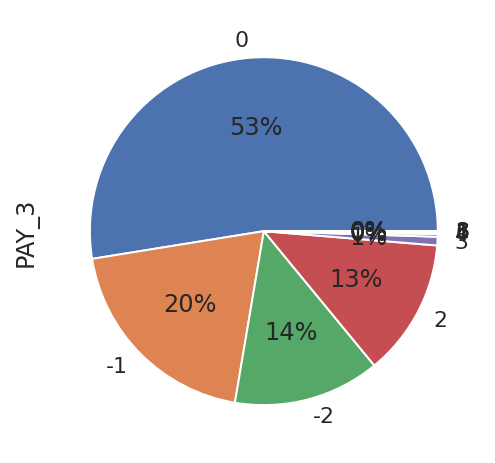

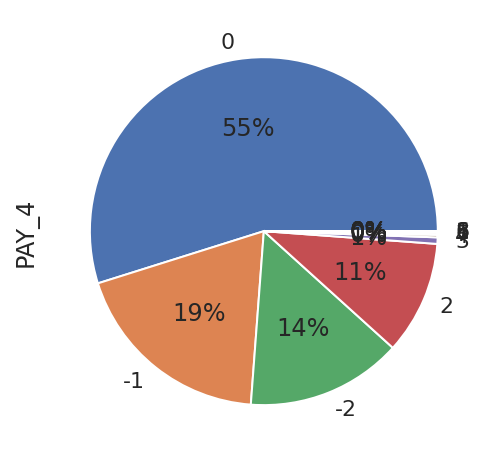

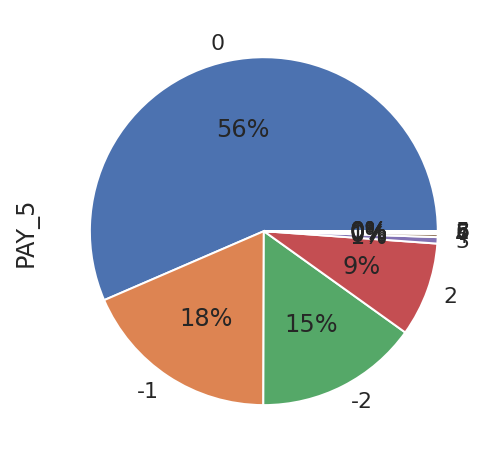

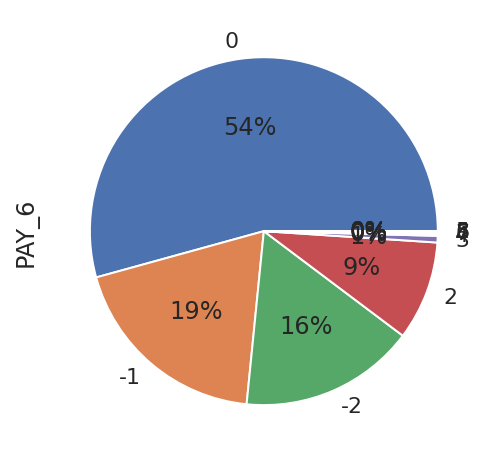

In [ ]:
print(pd.value_counts(df['PAY_0']) / len(df) * 100)
print(pd.value_counts(df['PAY_2']) / len(df) * 100)
print(pd.value_counts(df['PAY_3']) / len(df) * 100)
print(pd.value_counts(df['PAY_4']) / len(df) * 100)
print(pd.value_counts(df['PAY_5']) / len(df) * 100)
print(pd.value_counts(df['PAY_6']) / len(df) * 100)
pd.value_counts(df['PAY_0']).plot(kind='pie', y='PAY_1', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_2']).plot(kind='pie', y='PAY_2', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_3']).plot(kind='pie', y='PAY_3', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_4']).plot(kind='pie', y='PAY_4', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_5']).plot(kind='pie', y='PAY_5', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_6']).plot(kind='pie', y='PAY_6', autopct='%1.0f%%');
plt.show()

Payment in past 6 months vs Bill Amount in past 6 months


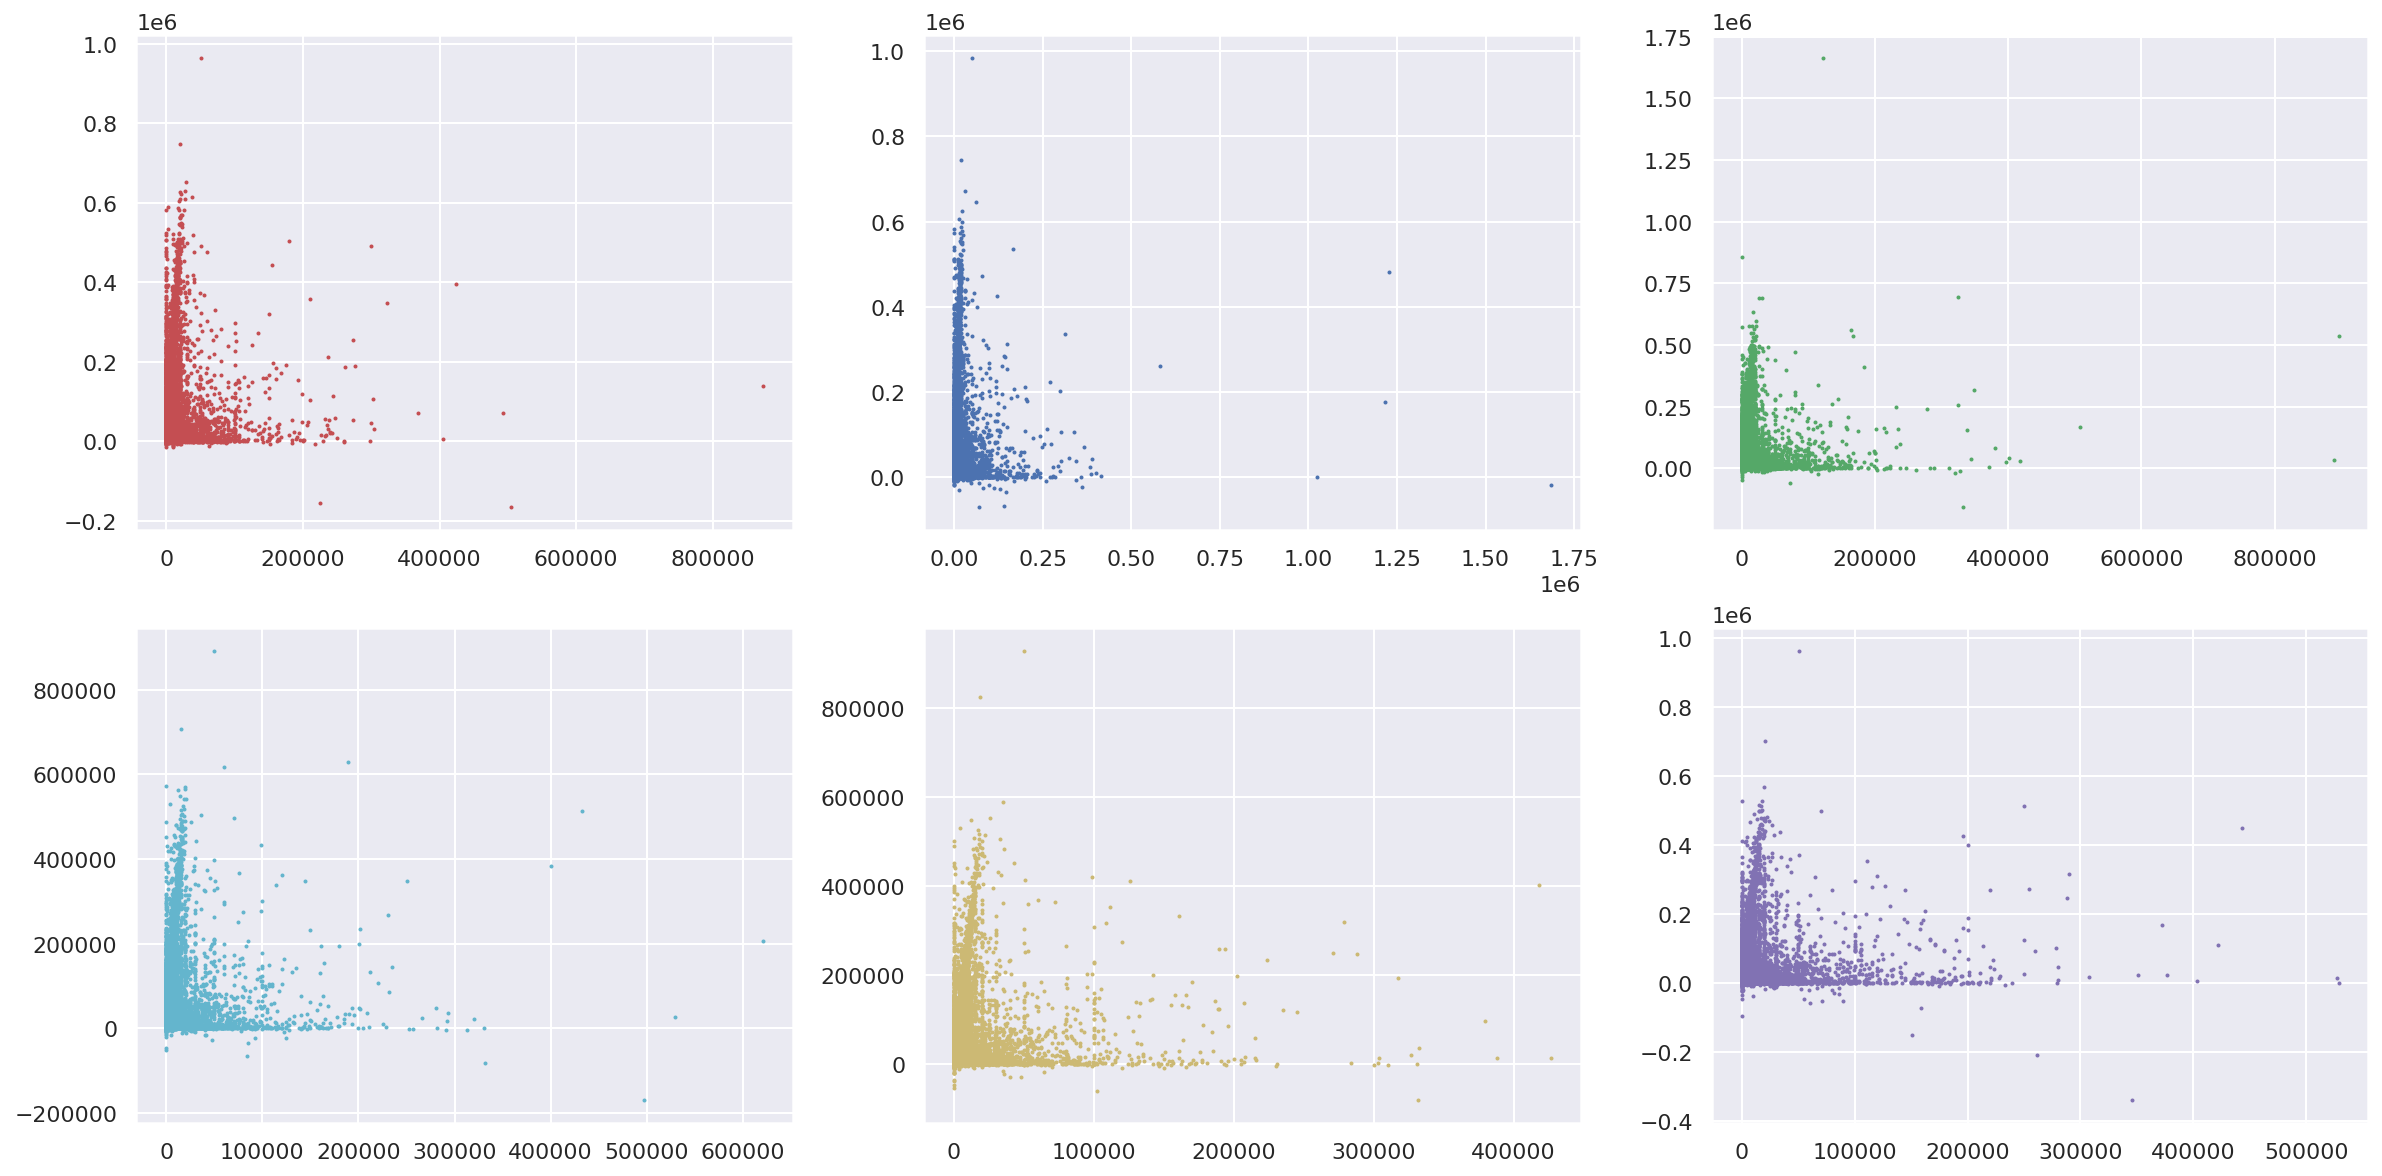

In [ ]:
print("Payment in past 6 months vs Bill Amount in past 6 months")
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()


There is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

In [ ]:
# to reduce multicolinearty we have two options whether to drop or add together and i decided to add
final_df_IQR["TOTAL_BILL_AMT1"] = df["BILL_AMT1"] + df["BILL_AMT2"]+ df["BILL_AMT3"]+ df["BILL_AMT4"]+ df["BILL_AMT5"]+ df["BILL_AMT6"]
final_df_IQR["TOTAL_PAY_AMT1"] = df["PAY_AMT1"] +df["PAY_AMT2"] +df["PAY_AMT3"] +df["PAY_AMT4"] +df["PAY_AMT5"] +df["PAY_AMT6"]
final_df_IQR["TOTAL_PAY"] = df["PAY_0"] +df["PAY_2"] +df["PAY_3"] +df["PAY_4"] +df["PAY_5"] +df["PAY_6"]


In [ ]:
# data afte àhandling outliers and multicolinearty
final= final_df_IQR[["LIMIT_BAL","TOTAL_PAY","TOTAL_BILL_AMT1","TOTAL_PAY_AMT1","SEX","AGE","LIMIT_BAL","EDUCATION","MARRIAGE","default payment next month"]].copy()
final

,LIMIT_BAL,TOTAL_PAY,TOTAL_BILL_AMT1,TOTAL_PAY_AMT1,SEX,AGE,LIMIT_BAL,EDUCATION,MARRIAGE,default payment next month
0,20000,-2,7704,689,2,24,20000,2,1,1
1,120000,3,17077,5000,2,26,120000,2,2,1
2,90000,0,101653,11018,2,34,90000,2,2,0
3,50000,0,231334,8388,2,37,50000,2,1,0
4,50000,-2,109339,59049,1,57,50000,2,1,0
...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,725349,42550,1,39,220000,3,1,0
29996,150000,-4,21182,14490,1,43,150000,3,2,0
29997,30000,8,70496,31300,1,37,30000,2,2,1
29998,80000,-1,266611,147181,1,41,80000,3,1,1


In [ ]:
final_df_IQR

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,TOTAL_BILL_AMT1,TOTAL_PAY_AMT1,TOTAL_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689.0,0.0,0.0,0,0.0,1,7704.00,689.0,-2
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000.0,1000.0,1000.0,0,2000.0,1,17077.00,5000.0,3
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500.0,1000.0,1000.0,1000,5000.0,0,101653.00,11018.0,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019.0,1200.0,1100.0,1069,1000.0,0,231334.00,8388.0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,11250.5,10000.0,9000.0,689,679.0,0,109339.00,33618.5,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,8500,11250.5,5003.0,3047.0,5000,1000.0,0,599573.25,33800.5,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,1837,3526.0,8998.0,129.0,0,0.0,0,21182.00,14490.0,-4
29997,29998,30000,1,2,2,37,4,3,2,-1,...,0,0.0,10677.5,4200.0,2000,3100.0,1,70496.00,19977.5,8
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11015,3409.0,1178.0,1926.0,9702,1804.0,1,266611.00,29034.0,-1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

seed=42
lr=LogisticRegression (random_state=seed)
rfc=RandomForestClassifier(random_state=seed)
gbc= GradientBoostingClassifier(random_state=seed)
dtc = DecisionTreeClassifier(random_state=seed)
lsvc= LinearSVC(random_state=seed)
models=[lr,rfc,gbc,dtc,lsvc]


In [16]:
# dat without any modification
x=df.drop(['ID','default payment next month'], axis=1)
y=df['default payment next month']
X_train, X_test, Y_train, Y_test = train_test_split( x,y , test_size = 0.2, random_state = 1000) 
print(X_train.shape)
print(X_test.shape)


(24000, 23)
(6000, 23)


**************************
LogisticRegression(random_state=42)
Accuracy: 77.72%
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4666
           1       0.43      0.01      0.01      1334

    accuracy                           0.78      6000
   macro avg       0.61      0.50      0.44      6000
weighted avg       0.70      0.78      0.68      6000



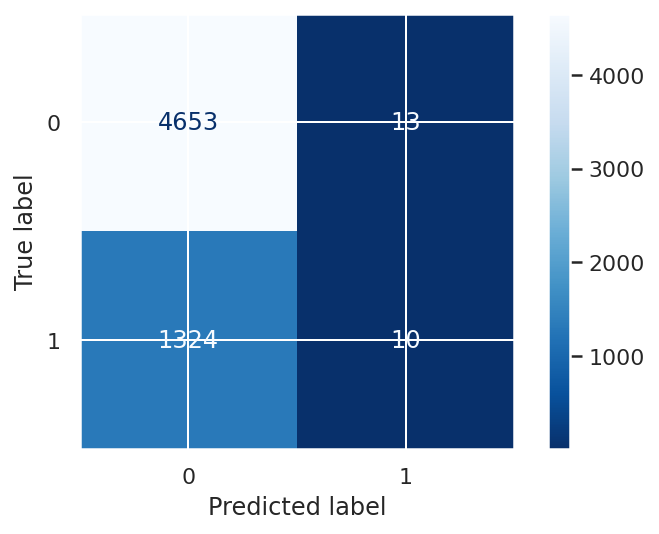

 
**************************
RandomForestClassifier(random_state=42)
Accuracy: 81.77%
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4666
           1       0.66      0.37      0.48      1334

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



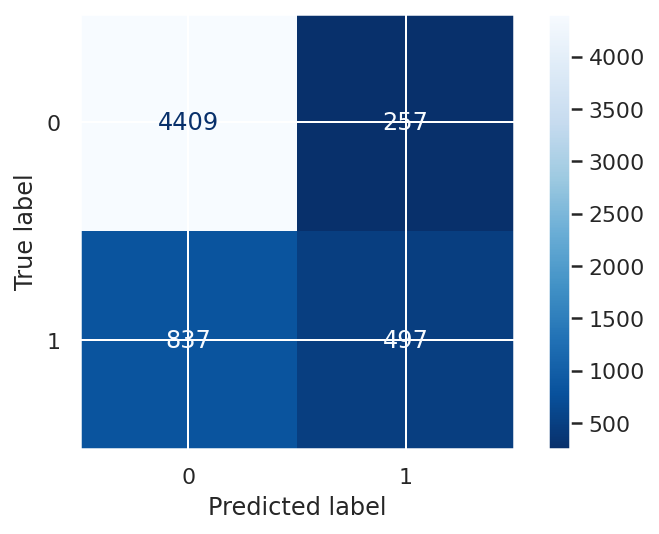

 
**************************
GradientBoostingClassifier(random_state=42)
Accuracy: 82.52%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4666
           1       0.70      0.38      0.49      1334

    accuracy                           0.83      6000
   macro avg       0.77      0.67      0.69      6000
weighted avg       0.81      0.83      0.80      6000



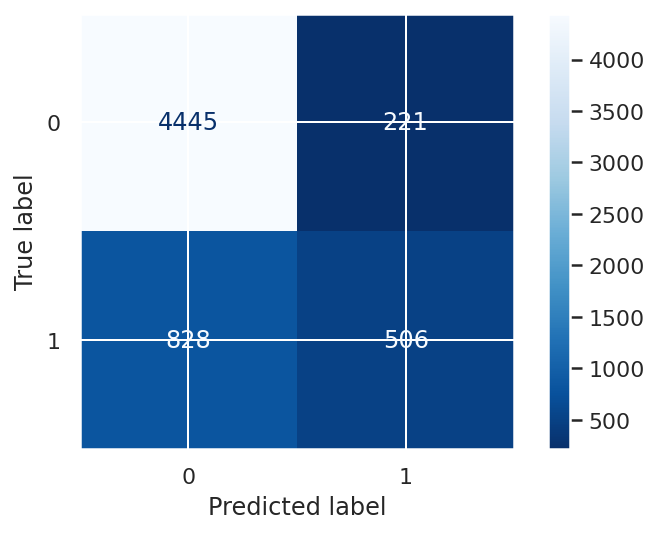

 
**************************
DecisionTreeClassifier(random_state=42)
Accuracy: 72.52%
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.39      0.42      0.40      1334

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.73      0.73      6000



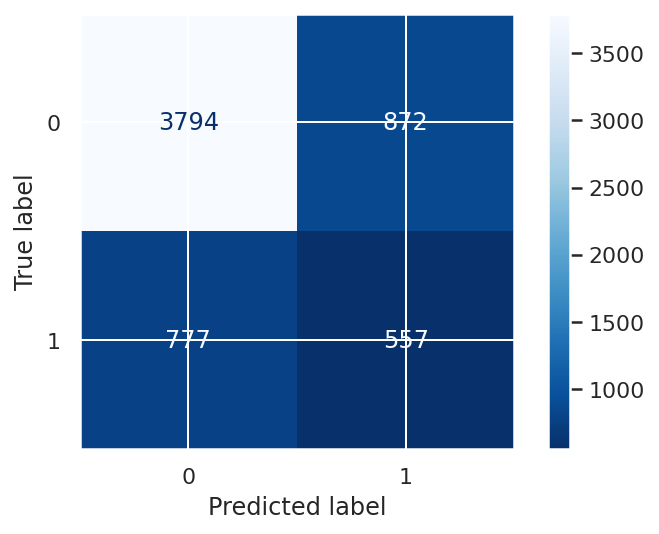

 
**************************
LinearSVC(random_state=42)
Accuracy: 77.67%
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4666
           1       0.00      0.00      0.00      1334

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.78      0.68      6000



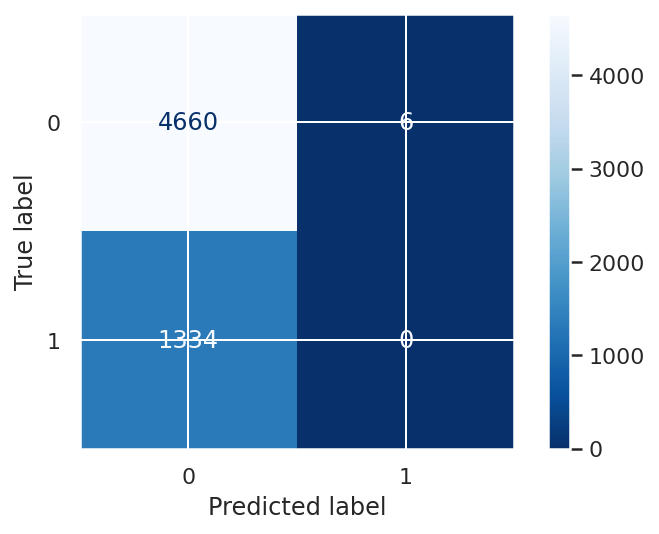

In [20]:
for model in models:
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_validation= model.predict(X_test)
    print("**************************")
    print(model)
    acc = accuracy_score(Y_test, Y_pred_validation)
    print('Accuracy: %.2f%%'%(acc*100))
    print( classification_report(Y_test, model.predict(X_test)))
    plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
    plt.show()
    print('============================')
    print(" ")


LogisticRegression(random_state=42)
Accuracy: 77.72%
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4666
           1       0.43      0.01      0.01      1334

    accuracy                           0.78      6000
   macro avg       0.61      0.50      0.44      6000
weighted avg       0.70      0.78      0.68      6000



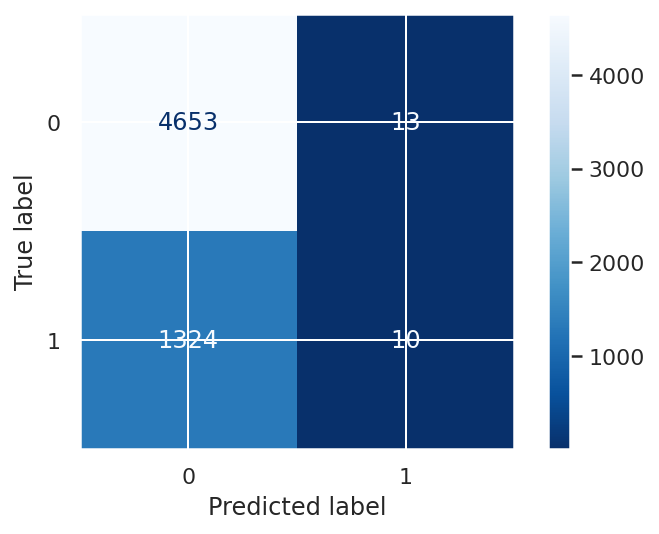

 
RandomForestClassifier(random_state=42)
Accuracy: 81.77%
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4666
           1       0.66      0.37      0.48      1334

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



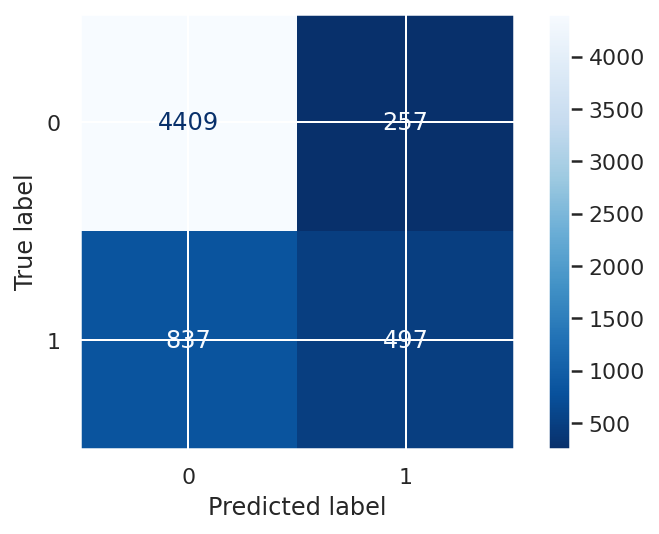

 
GradientBoostingClassifier(random_state=42)
Accuracy: 82.52%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4666
           1       0.70      0.38      0.49      1334

    accuracy                           0.83      6000
   macro avg       0.77      0.67      0.69      6000
weighted avg       0.81      0.83      0.80      6000



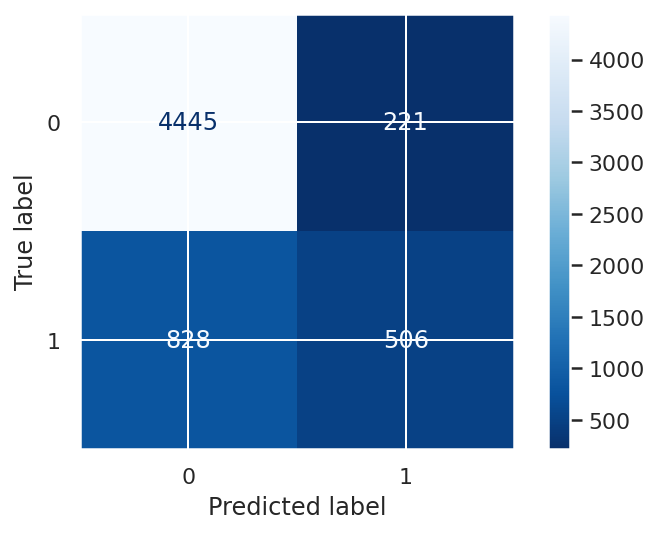

 
DecisionTreeClassifier(random_state=42)
Accuracy: 72.52%
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.39      0.42      0.40      1334

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.73      0.73      6000



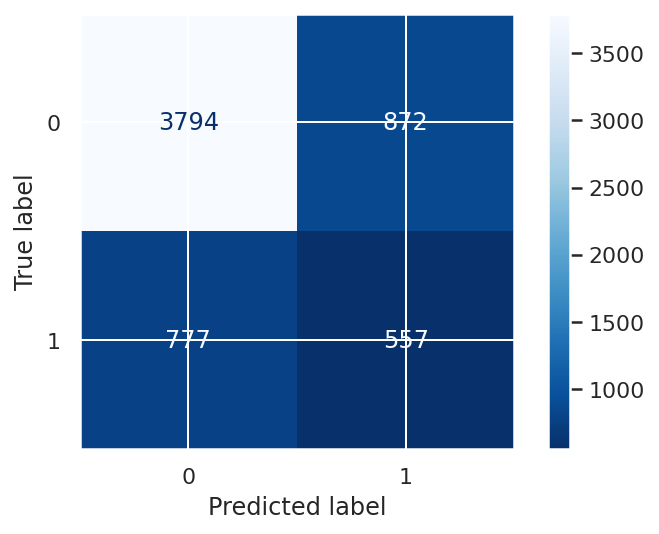

 
LinearSVC(random_state=42)
Accuracy: 77.67%
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4666
           1       0.00      0.00      0.00      1334

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.78      0.68      6000



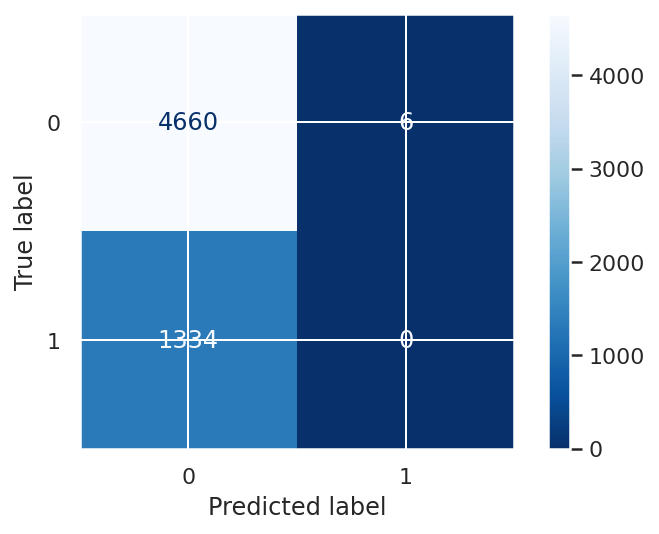

In [18]:
model=lr
grid_values = {'val':[0.001,0.01,0.1,0.5,1.0],'c_val': [0.001,0.01,0.1,0.5,1.0]}
lr = GridSearchCV(lr, grid_values, scoring = 'accuracy', cv=5, verbose=1)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")

model=rfc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rfc = GridSearchCV(rfc,grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=gbc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbc = GridSearchCV(gbc, param_grid = grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=dtc
grid_values = {'max_depth': list(range(2, 10)),'splitter' : ['best','random']}
dtc = GridSearchCV(dtc, grid_values, verbose=1, cv=5 ,scoring='accuracy')
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=lsvc
grid_values = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
lsvc = GridSearchCV(lsvc, grid_values, refit = True, cv=5,verbose = 3,scoring='accuracy')
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()


In [21]:
model=rfc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rfc = RandomizedSearchCV(rfc,grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=gbc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbc = RandomizedSearchCV(gbc, param_grid = grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: ignored

In [ ]:
# data after removing multicolinery 
x=final_df_IQR.drop(['ID','default payment next month'], axis=1)
y=final_df_IQR['default payment next month']

X_train, X_test, Y_train, Y_test = train_test_split( x,y , test_size = 0.2, random_state = 1000) 
print(X_train.shape)
print(X_test.shape)
print("")

(24000, 26)
(6000, 26)



**************************
LogisticRegression(random_state=42)
Accuracy: 77.72%
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4666
           1       0.43      0.01      0.01      1334

    accuracy                           0.78      6000
   macro avg       0.61      0.50      0.44      6000
weighted avg       0.70      0.78      0.68      6000



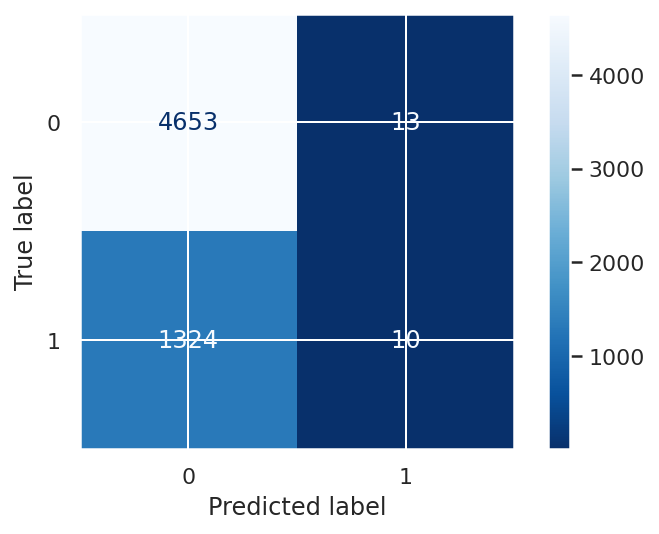

 
**************************
RandomForestClassifier(random_state=42)
Accuracy: 81.55%
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4666
           1       0.65      0.38      0.48      1334

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



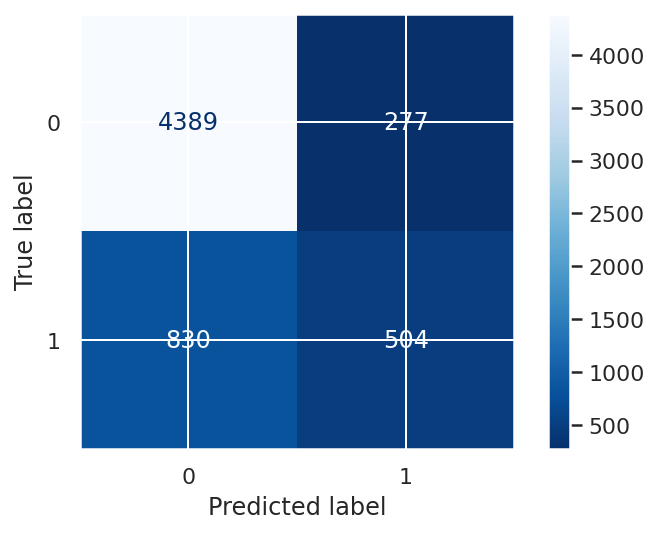

 
**************************
GradientBoostingClassifier(random_state=42)
Accuracy: 82.18%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4666
           1       0.68      0.38      0.49      1334

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



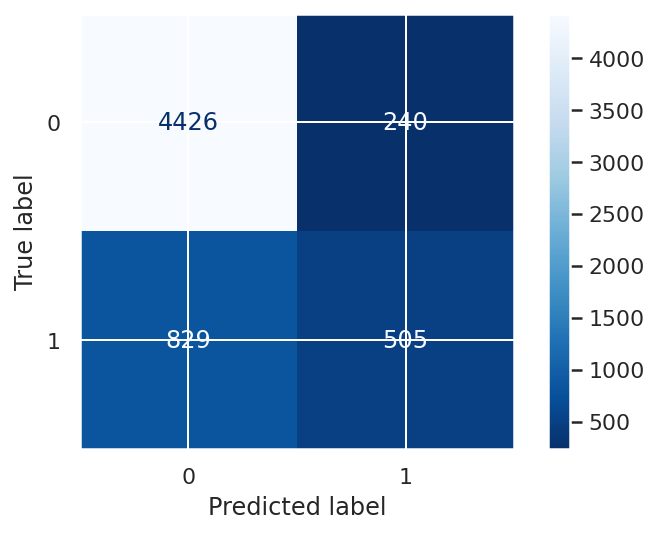

 
**************************
DecisionTreeClassifier(random_state=42)
Accuracy: 72.48%
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.39      0.42      0.40      1334

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



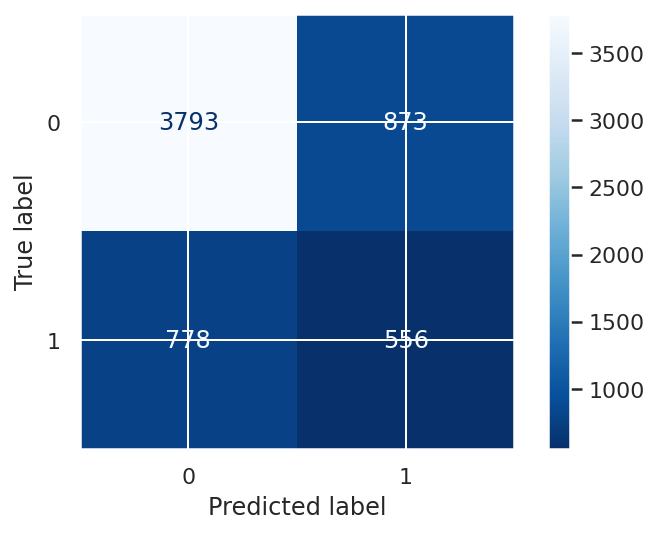

 
**************************
LinearSVC(random_state=42)
Accuracy: 58.05%
              precision    recall  f1-score   support

           0       0.82      0.59      0.69      4666
           1       0.28      0.56      0.37      1334

    accuracy                           0.58      6000
   macro avg       0.55      0.57      0.53      6000
weighted avg       0.70      0.58      0.62      6000



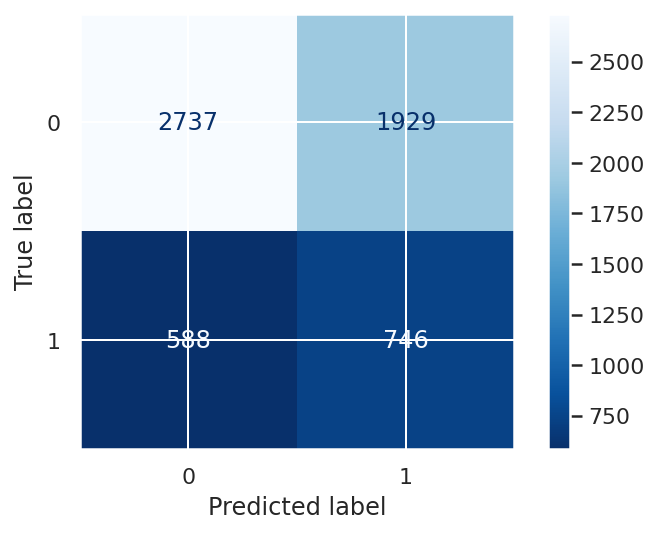

In [ ]:
for model in models:
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_validation= model.predict(X_test)
    print("**************************")
    print(model)
    acc = accuracy_score(Y_test, Y_pred_validation)
    print('Accuracy: %.2f%%'%(acc*100))
    print( classification_report(Y_test, model.predict(X_test)))
    plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
    plt.show()
    print('============================')
    print(" ")


LogisticRegression(random_state=42)
Accuracy: 77.72%
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4666
           1       0.43      0.01      0.01      1334

    accuracy                           0.78      6000
   macro avg       0.61      0.50      0.44      6000
weighted avg       0.70      0.78      0.68      6000



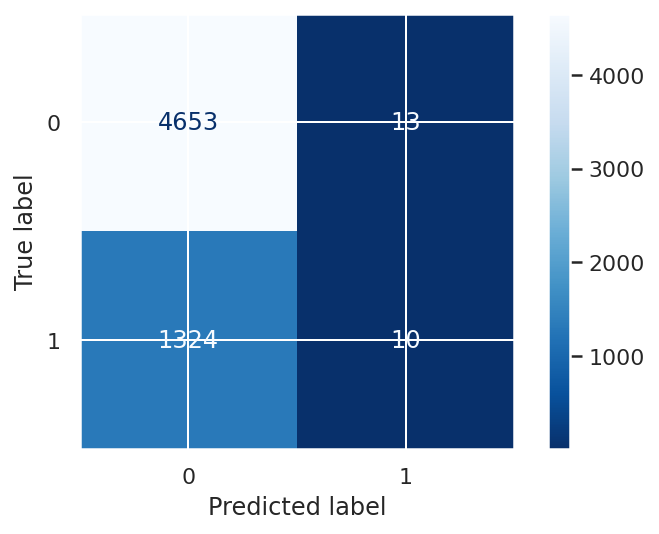

RandomForestClassifier(random_state=42)
Accuracy: 81.55%
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4666
           1       0.65      0.38      0.48      1334

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



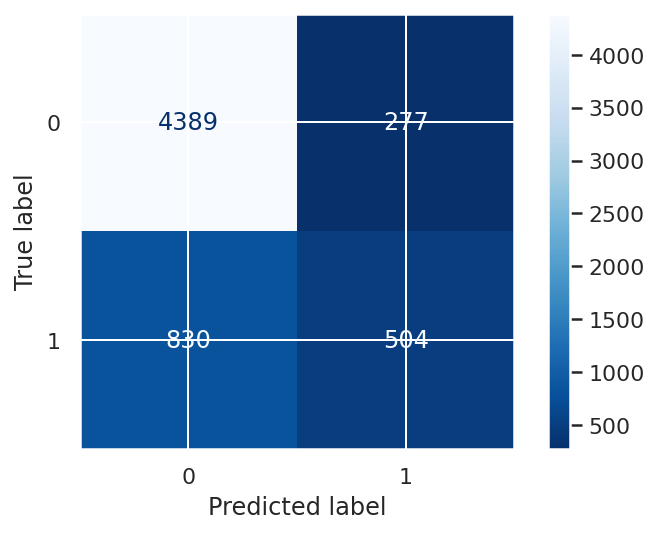

GradientBoostingClassifier(random_state=42)
Accuracy: 82.18%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4666
           1       0.68      0.38      0.49      1334

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



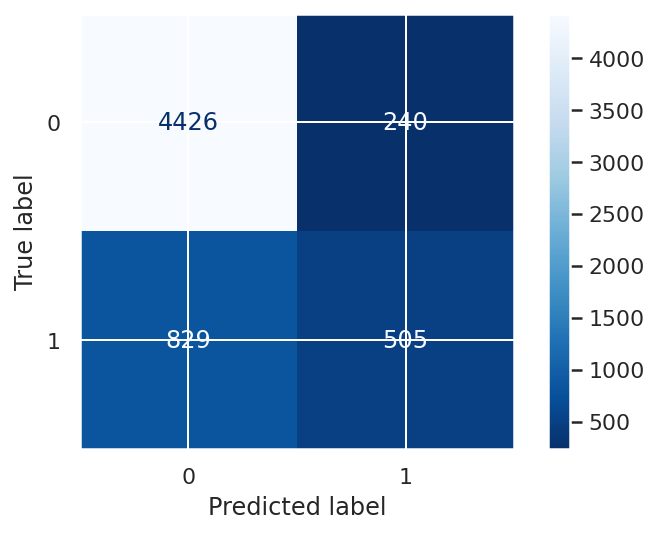

DecisionTreeClassifier(random_state=42)
Accuracy: 72.48%
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.39      0.42      0.40      1334

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



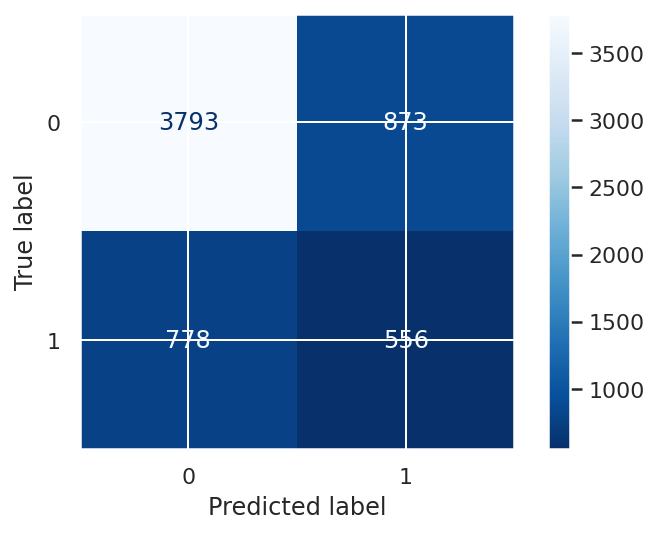

LinearSVC(random_state=42)
Accuracy: 58.05%
              precision    recall  f1-score   support

           0       0.82      0.59      0.69      4666
           1       0.28      0.56      0.37      1334

    accuracy                           0.58      6000
   macro avg       0.55      0.57      0.53      6000
weighted avg       0.70      0.58      0.62      6000



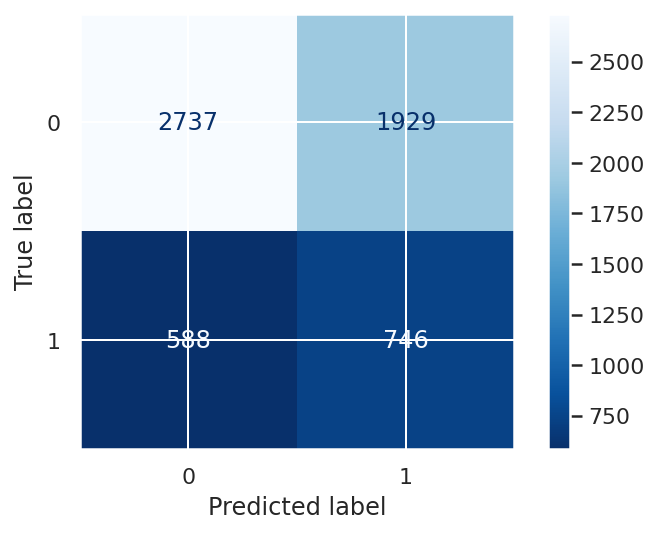

In [ ]:
model=lr
grid_values = {'val':[0.001,0.01,0.1,0.5,1.0],'c_val': [0.001,0.01,0.1,0.5,1.0]}
lr = GridSearchCV(lr, grid_values, scoring = 'accuracy', cv=5, verbose=1)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")

model=rfc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rfc = GridSearchCV(rfc,grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=gbc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbc = GridSearchCV(gbc, param_grid = grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=dtc
grid_values = {'max_depth': list(range(2, 10)),'splitter' : ['best','random']}
dtc = GridSearchCV(dtc, grid_values, verbose=1, cv=5 ,scoring='accuracy')
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=lsvc
grid_values = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
lsvc = GridSearchCV(lsvc, grid_values, refit = True, cv=5,verbose = 3,scoring='accuracy')
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()


In [ ]:
# data after removing outliers and multicolinearty
x=final.drop(['default payment next month'], axis=1)
y=final['default payment next month']

X_train, X_test, Y_train, Y_test = train_test_split( x,y , test_size = 0.2, random_state = 1000) 
print(X_train.shape)
print(X_test.shape)

(24000, 9)
(6000, 9)


**************************
LogisticRegression(random_state=42)
Accuracy: 77.80%
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4666
           1       0.75      0.00      0.00      1334

    accuracy                           0.78      6000
   macro avg       0.76      0.50      0.44      6000
weighted avg       0.77      0.78      0.68      6000



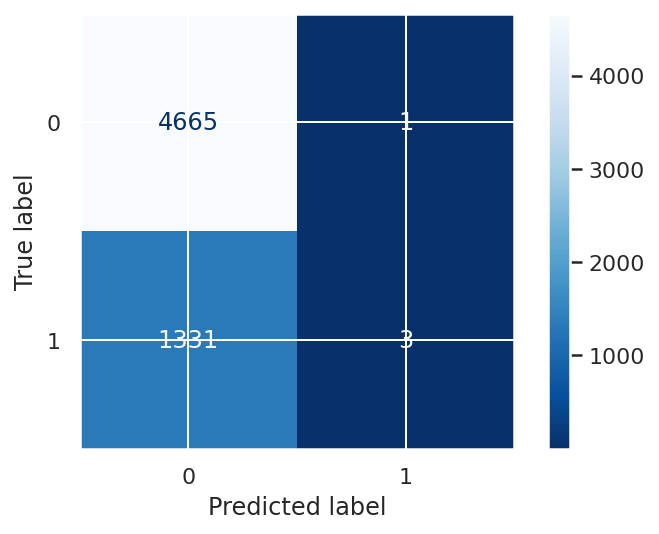

 
**************************
RandomForestClassifier(random_state=42)
Accuracy: 79.48%
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4666
           1       0.57      0.32      0.41      1334

    accuracy                           0.79      6000
   macro avg       0.70      0.62      0.64      6000
weighted avg       0.77      0.79      0.77      6000



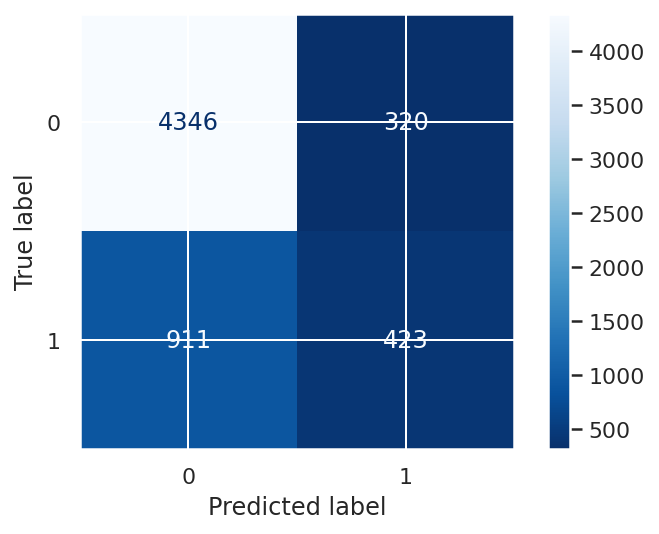

 
**************************
GradientBoostingClassifier(random_state=42)
Accuracy: 80.72%
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4666
           1       0.63      0.32      0.42      1334

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



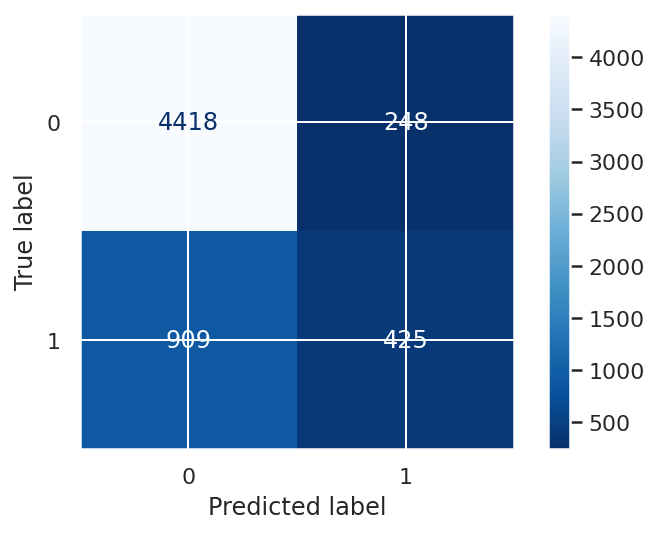

 
**************************
DecisionTreeClassifier(random_state=42)
Accuracy: 71.82%
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.38      0.41      0.39      1334

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.72      6000



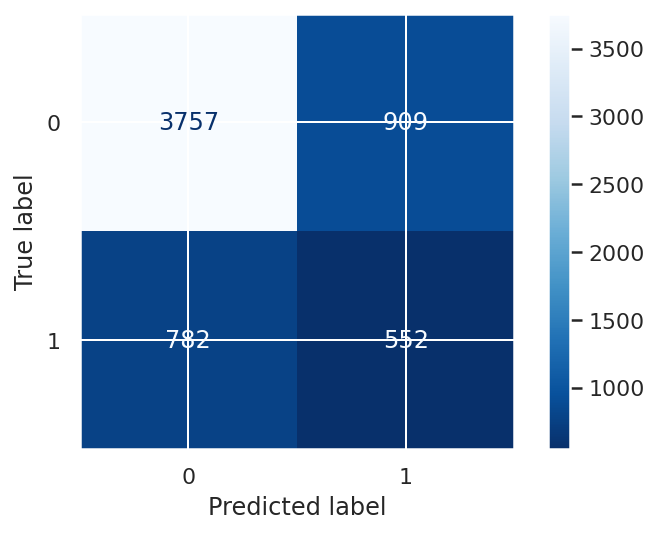

 
**************************
LinearSVC(random_state=42)
Accuracy: 45.90%
              precision    recall  f1-score   support

           0       0.74      0.47      0.58      4666
           1       0.18      0.42      0.25      1334

    accuracy                           0.46      6000
   macro avg       0.46      0.44      0.41      6000
weighted avg       0.61      0.46      0.50      6000



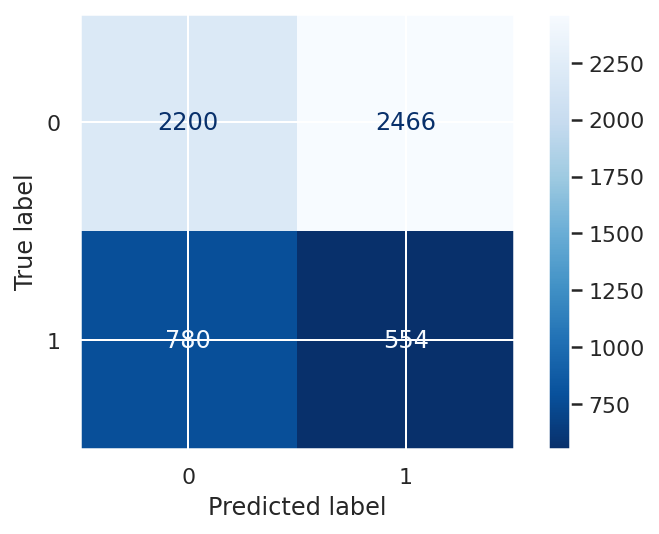

In [ ]:
for model in models:
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_validation= model.predict(X_test)
    print("**************************")
    print(model)
    acc = accuracy_score(Y_test, Y_pred_validation)
    print('Accuracy: %.2f%%'%(acc*100))
    print( classification_report(Y_test, model.predict(X_test)))
    plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
    plt.show()
    print('============================')
    print(" ")


LogisticRegression(random_state=42)
Accuracy: 77.80%
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4666
           1       0.75      0.00      0.00      1334

    accuracy                           0.78      6000
   macro avg       0.76      0.50      0.44      6000
weighted avg       0.77      0.78      0.68      6000



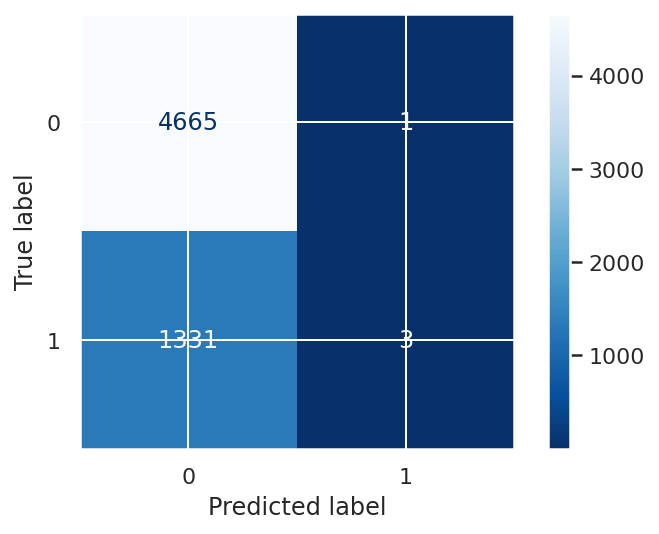

RandomForestClassifier(random_state=42)
Accuracy: 79.48%
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4666
           1       0.57      0.32      0.41      1334

    accuracy                           0.79      6000
   macro avg       0.70      0.62      0.64      6000
weighted avg       0.77      0.79      0.77      6000



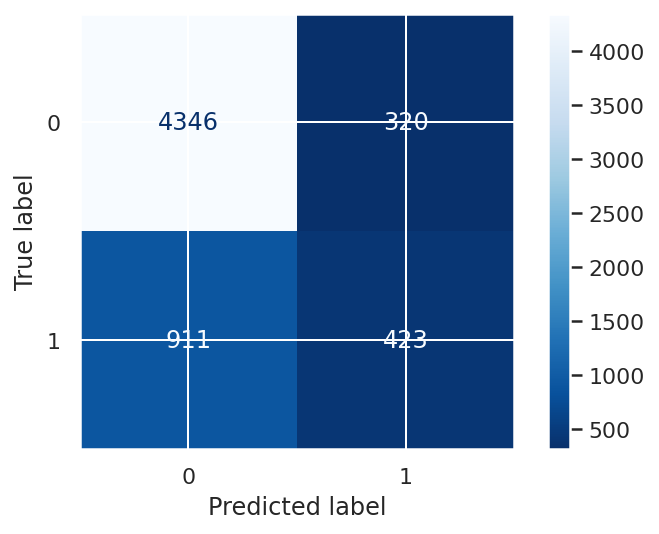

GradientBoostingClassifier(random_state=42)
Accuracy: 80.72%
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4666
           1       0.63      0.32      0.42      1334

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



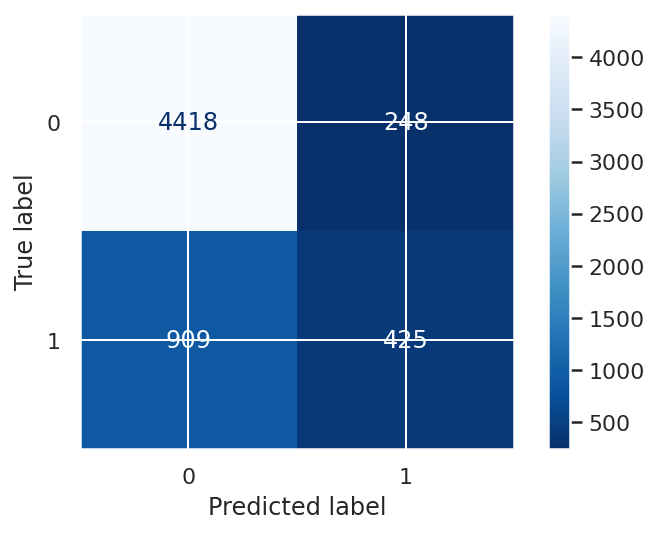

DecisionTreeClassifier(random_state=42)
Accuracy: 71.82%
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.38      0.41      0.39      1334

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.72      6000



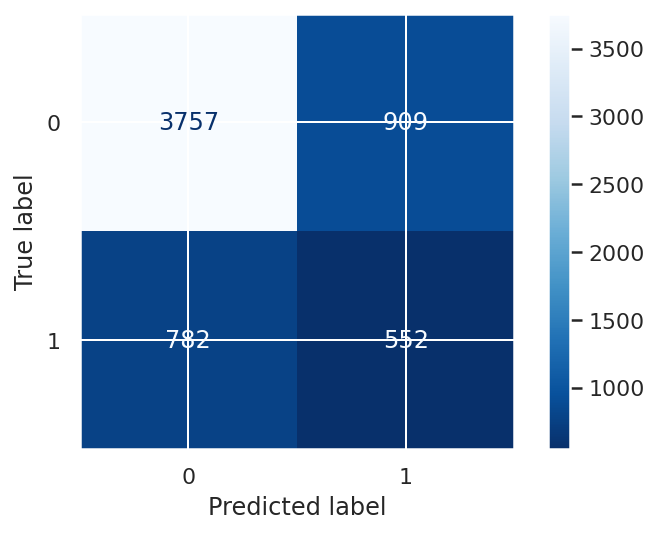

LinearSVC(random_state=42)
Accuracy: 45.90%
              precision    recall  f1-score   support

           0       0.74      0.47      0.58      4666
           1       0.18      0.42      0.25      1334

    accuracy                           0.46      6000
   macro avg       0.46      0.44      0.41      6000
weighted avg       0.61      0.46      0.50      6000



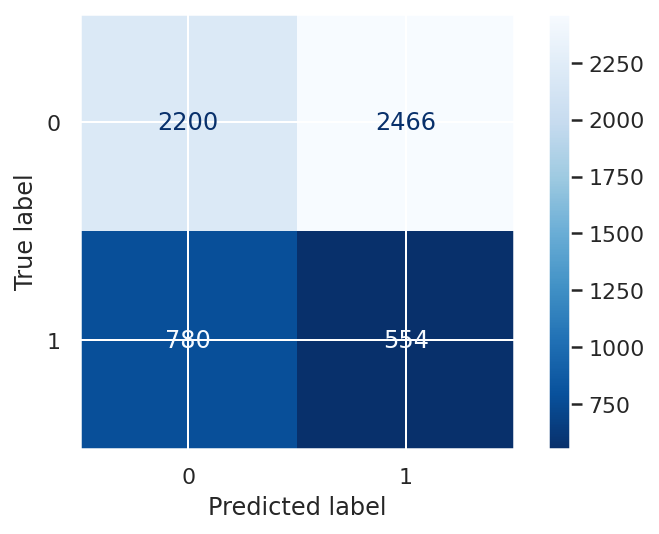

In [ ]:
model=lr
grid_values = {'val':[0.001,0.01,0.1,0.5,1.0],'c_val': [0.001,0.01,0.1,0.5,1.0]}
lr = GridSearchCV(lr, grid_values, scoring = 'accuracy', cv=5, verbose=1)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")

model=rfc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rfc = GridSearchCV(rfc,grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=gbc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbc = GridSearchCV(gbc, param_grid = grid_values, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=dtc
grid_values = {'max_depth': list(range(2, 10)),'splitter' : ['best','random']}
dtc = GridSearchCV(dtc, grid_values, verbose=1, cv=5 ,scoring='accuracy')
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


model=lsvc
grid_values = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
lsvc = GridSearchCV(lsvc, grid_values, refit = True, cv=5,verbose = 3,scoring='accuracy')
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='accuracy')
Accuracy: 82.22%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4666
           1       0.69      0.37      0.48      1334

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



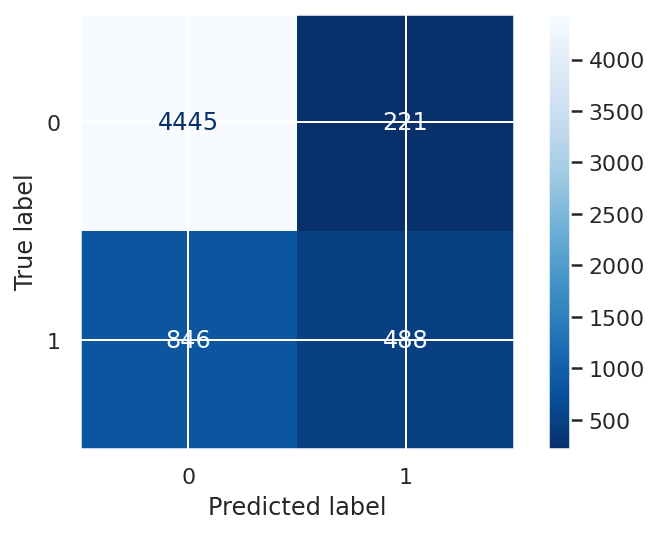

In [23]:
# model from seneraio 1
model=rfc
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rfc = GridSearchCV(rfc,grid_values, scoring = ('accuracy','roc_auc'),  cv=5)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_validation= model.predict(X_test)
print(model)
acc = accuracy_score(Y_test, Y_pred_validation)
print('Accuracy: %.2f%%'%(acc*100))
print( classification_report(Y_test, model.predict(X_test)))
plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
plt.show()
print(" ")


In [24]:
model.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=80, random_state=42)

In [25]:
model = model.best_estimator_

In [26]:
# Get the probabilities on train and test
train_probs = model.predict_proba(X_train)[:,1]
test_probs = model.predict_proba(X_test)[:,1]
print(train_probs)
print(test_probs)


[0.53581321 0.10289185 0.11682162 ... 0.40657838 0.10548839 0.13513757]
[0.12510304 0.12516919 0.55501465 ... 0.16945327 0.15041452 0.14217861]


In [27]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_validation)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.83075
The accuracy on test dataset is 0.8221666666666667


In [28]:
model.feature_importances_

array([0.03201022, 0.00186695, 0.00463673, 0.00240011, 0.01210314,
       0.32504249, 0.15492779, 0.0700682 , 0.06904735, 0.05673624,
       0.05305127, 0.02013487, 0.02044901, 0.01494483, 0.01382472,
       0.01411613, 0.0123039 , 0.03512769, 0.02027802, 0.01851448,
       0.01888549, 0.01402497, 0.0155054 ])

In [29]:
importances = model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


In [30]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
5,PAY_0,0.325042
6,PAY_2,0.154928
7,PAY_3,0.070068
8,PAY_4,0.069047
9,PAY_5,0.056736
10,PAY_6,0.053051
17,PAY_AMT1,0.035128
0,LIMIT_BAL,0.032010
12,BILL_AMT2,0.020449
18,PAY_AMT2,0.020278
